# Make a FisherMatrix object that was only limited by l_max also have a k_max limit - this version modified to use bin centers instead of leading edges

In [1]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import noiseCl as ncl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

IMPORT ERROR: /opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


# Load two k,g + T,E Fisher Objects with noise

In [2]:
# Load saved Fobj2, Fobj4
# The suffix 2 is for nonlinear, suffix 4 is for linear (just to keep with the established pattern)

import FisherCl as fcl
import noiseCl as ncl
import crosspower as cp
import pickle

#filehandler_TE = open('Fisher_7_16Jn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

filehandler_TE = open('Fisher_7_16In0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_TE = open('Fisher_7_16Hn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 2 (Gold); from FisherCl branch quickCl
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5

#filehandler_TE = open('Fisher_7_16Gn0.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 66 (in FisherCl)
# uses nBins=16 bin version with beesBins v16; modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z
# shot noise without b^2, kk noise converted from pp (not dd), kk noise divided by 2.5


#filehandler_TE = open('Fisher_7_6Cn.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True; nbar=66 (in FisherCl); nBins = 6 (in dndzMode1)
# modified cp.byeBiasFit to use b(z)=1+z instead of standard 1+0.84*z

#filehandler_TE = open('Fisher_7_6Bn.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True; nbar=66 (in FisherCl); nBins = 6 (in dndzMode1)
# galaxy shot noise re-made without b*2 scaling, reconstruction noise re-made with phi->k not d->k

#filehandler_TE = open('Fisher_7_6B.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'degenerate', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True; nbar=66 (in FisherCl); nBins = 6 (in dndzMode1)

# set nbar = 66 in FisherCl for optimistic
#filehandler_TE = open('Fisher_7_16D_nbar66.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; normBin2 introduced since 7_16C

# set nbar = 40 in FisherCl for gold
#filehandler_TE = open('Fisher_7_16A2_nbar40.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ with z0=0.3(Gold), dndzMode=2; 
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16



# the nbar tests

# set nbar = 66 in FisherCl for optimistic
#filehandler_TE = open('Fisher_7_16D_nBad.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; normBin2 introduced since 7_16C

# set nbar = 40 in FisherCl for gold
#filehandler_TE = open('Fisher_7_16A2_nBad.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ with z0=0.3(Gold), dndzMode=2; 
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16




#filehandler = open('Fisher_7_16A2.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ with z0=0.3(Gold), dndzMode=2; 
# set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16

#filehandler = open('Fisher_7_16E.obj','w') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; normBin2 introduced since 7_16C

#filehandler_TE = open('Fisher_7_16D.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True, nbar = 40
# uses nBins=16 bin version with beesBins v16; normBin2 introduced since 7_16C

#filehandler_kg = open('Fisher_7_16C.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = False; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16; winKbin fix since 7_16B

#filehandler_kg = open('Fisher_7_16B.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = False; dndzMode = 1 (kludged); from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use getDNDZM (Optimistic); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16

#filehandler_TE = open('Fisher_7_16A.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ with z0=0.3(Gold); set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# uses nBins=16 bin version with beesBins v16

#filehandler_TE = open('Fisher_7_6An.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3 (neither gold nor optimistic); 
# set cp.tophat beesBins=True; biasByBin = False (uses sigma(b)/b), dw = 0.05
# useNoise = True; noise level fixed: nbar = 66

#filehandler_TE = open('Fisher_7_6A.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# biasByBin = False (uses sigma(b)/b), dw = 0.05, useNoise = True
# apparently this one had way too much shot noise - need to re-make it with fixed code

#filehandler2 = open('Fisher_7_6X2_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=True,

#filehandler4 = open('Fisher_7_6X4_w2_wan.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000, nz=3e5; nonlinear=False,


Fobj3 = pickle.load(filehandler_TE) 

oneFile = True # to use the same file for TE,kg
#oneFile = False # to use the same file for TE,kg
if oneFile:
    Fobj2 = Fobj3
else: # load the other file
    Fobj2 = pickle.load(filehandler_kg) 



#Fobj4 = pickle.load(filehandler4) 


lmin = Fobj2.lmin
lmax = Fobj2.lmax
nBins = Fobj2.nBins
nMaps = Fobj2.nBins + 1
nParams = Fobj2.nParams
nCosParams = Fobj2.nParams - Fobj2.nBins
ells = Fobj2.ells
obsNames = Fobj2.obsNames
paramList = Fobj2.paramList

print Fobj2.obsList
print Fobj2.obsNames
print Fobj2.paramList

print Fobj2.Fij.shape
print Fobj3.FijTE.shape
print Fobj2.nParams
print Fobj2.nCosParams



[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 162. 163. 164. 165. 166. 167. 168. 169. 180.
 181. 182. 183. 184. 185. 186. 198. 199. 200. 201. 202. 203. 216. 217.
 218. 219. 220. 234. 235. 236. 237. 252. 253. 254. 270. 271. 288.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9',

In [3]:
print Fobj2.crossCls.shape
print Fobj2.noiseCls.shape
print np.diag(Fobj2.noiseCls[:,:,0])[1:]

(17, 17, 2999)
(17, 17, 2999)
[7.00269216e-08 1.75679864e-08 1.22500030e-08 1.20984346e-08
 1.41925127e-08 1.84465820e-08 2.56638289e-08 3.74771517e-08
 5.67485558e-08 8.84016776e-08 1.04614538e-07 2.18430009e-07
 3.94357306e-07 1.01827657e-06 4.02893229e-06 1.26542465e-05]


In [4]:
if nBins == 6:
    binEdges = [0.0,0.5,1.0,2.0,3.0,4.0,7.0]
elif nBins == 16:
    binEdges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 
                2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
print binEdges

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0, 7.0]


In [5]:
# all on one plot; emulate Marcel's fig.6
doMplot = False

if doMplot:
    #nFac = 40./66
    for binNum in range(0,nBins+1):
        plt.loglog(Fobj2.ells,Fobj2.crossCls[binNum,binNum],color='C{0}'.format(binNum%10),label='bin {0}'.format(binNum))
        plt.loglog(Fobj2.ells,Fobj2.noiseCls[binNum,binNum],color='C{0}'.format(binNum%10),linestyle='--')
        print Fobj2.noiseCls[binNum,binNum,0] #*nFac
        #plt.title('bin number {0}: from redshift {1} to {2}'.format(binNum,binEdges[binNum-1],binEdges[binNum]))
    plt.xlim([2e0,2e3])
    plt.ylim([1e-9,1e-4])
    plt.legend()
    plt.show()

In [6]:
# copy noise levels from M's paper:
if doMplot:
    nGalaxies = [9.3e8,1.55e9,1.40e9,2.4e8,9.4e7,4.3e7]
    nGalSum = np.sum(nGalaxies)
    # fiducial bias = 1+z (not what I'm using)
    survAreaSqDeg = 18000 # sq.deg.
    survArea = survAreaSqDeg*60*60

    print 'nbar = ',nGalSum/survArea

In [7]:
# all on one plot; emulate Marcel's fig.6
if doMplot:
    print 'Marcel_s N_gg'
    plt.figure(figsize=(10,10))
    for binNum in range(0,nBins+1):
        plt.loglog(Fobj2.ells,Fobj2.crossCls[binNum,binNum],color='C{0}'.format(binNum%10),label='bin {0}'.format(binNum))
        if binNum == 0:
            noiseCls_ggM = Fobj2.noiseCls[binNum,binNum]
        else:
            noiseCls_ggM = noiseClggM[binNum-1]*np.ones(Fobj2.lmax-Fobj2.lmin+1)
        plt.loglog(Fobj2.ells,noiseCls_ggM,color='C{0}'.format(binNum%10),linestyle='--')
        print noiseClggM[binNum-1]
        #plt.title('bin number {0}: from redshift {1} to {2}'.format(binNum,binEdges[binNum-1],binEdges[binNum]))
    plt.xlim([2e0,2e3])
    plt.ylim([1e-9,1e-4])
    plt.legend()
    plt.show()

In [8]:
# compare to Bye's Cl^gg, Fij
byeDir = 'Byeonghee_clgg/'
clggGoldFile = 'clgg_gold.dat'
clggOptiFile = 'clgg_optimistic.dat'
FijGoldFile = 'Fisher_goldLSST_S4.dat'
FijOptiFile = 'Fisher_optimisticLSST_S4.dat'

clggGold = np.loadtxt(byeDir+clggGoldFile)
clggOpti = np.loadtxt(byeDir+clggOptiFile)
FijGold = np.loadtxt(byeDir+FijGoldFile)
FijOpti = np.loadtxt(byeDir+FijOptiFile)

beesElls = np.arange(2,2001+1, dtype=np.float64)

print 'done.'

done.


In [9]:
print clggGold.shape
print clggOpti.shape

(2000, 16)
(2000, 16)


In [10]:
# copied from calculation below, with kmax = 0.3 h/Mpc
lmaxByBin = [  86,  246,  389,  516,  628,  728,  816,  896,  967, 1032, 1105, 1182, 1261, 1348,
 1431, 1641]
print lmaxByBin

[86, 246, 389, 516, 628, 728, 816, 896, 967, 1032, 1105, 1182, 1261, 1348, 1431, 1641]


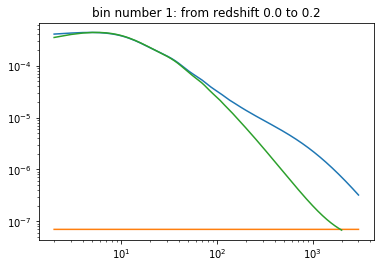

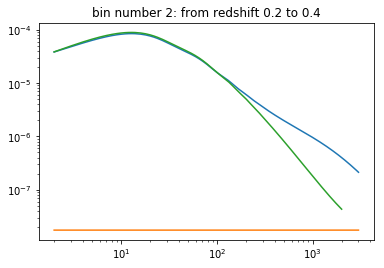

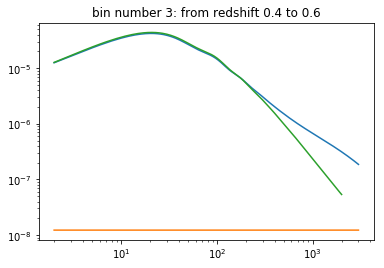

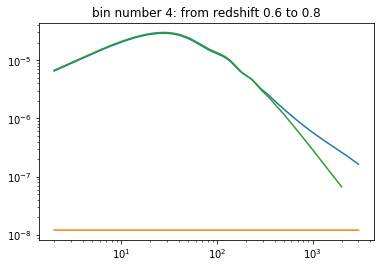

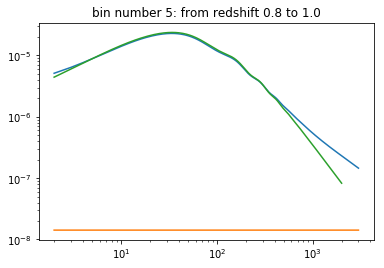

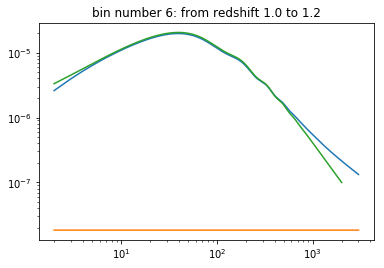

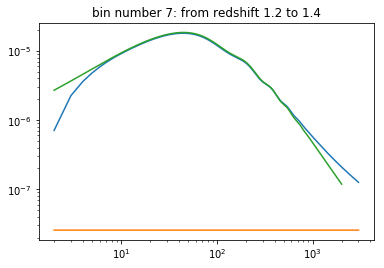

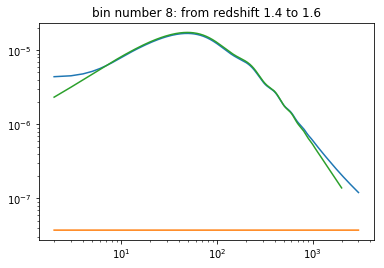

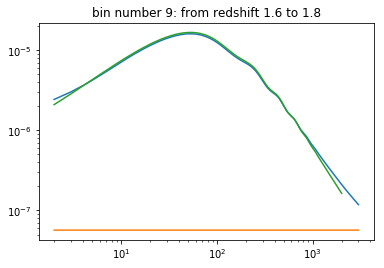

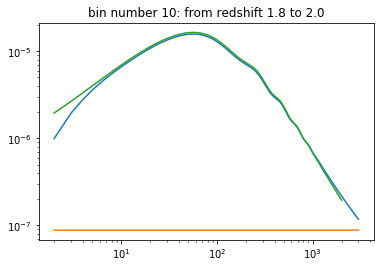

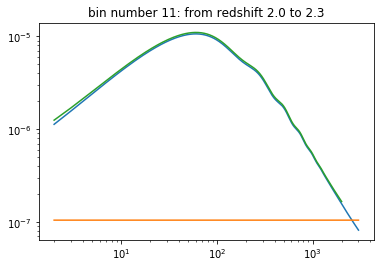

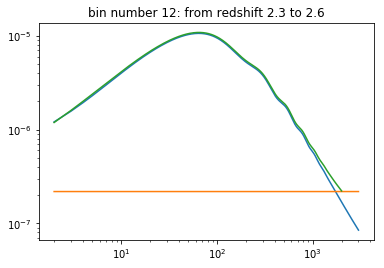

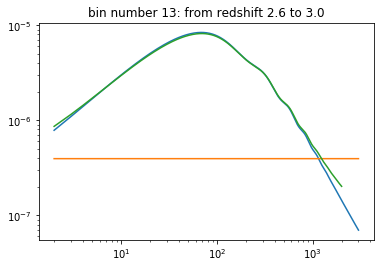

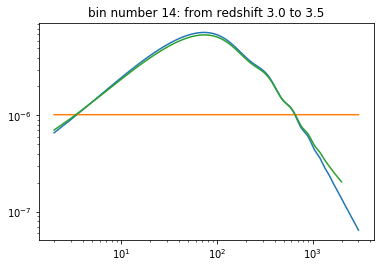

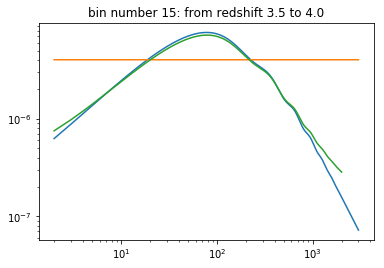

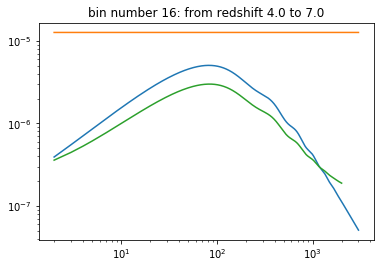

In [11]:
for binNum in range(1,17):
    #plt.semilogy(Fobj2.ells,Fobj2.crossCls[binNum,binNum])
    #plt.semilogy(Fobj2.ells,Fobj2.noiseCls[binNum,binNum])
    
    ##plt.semilogy(beesElls,clggGold[:,binNum-1])
    #plt.semilogy(beesElls,clggOpti[:,binNum-1])
    
    plt.loglog(Fobj2.ells,Fobj2.crossCls[binNum,binNum])
    plt.loglog(Fobj2.ells,Fobj2.noiseCls[binNum,binNum])
    
    #plt.loglog(beesElls,clggGold[:,binNum-1])
    plt.loglog(beesElls,clggOpti[:,binNum-1])
    
    plt.title('bin number {0}: from redshift {1} to {2}'.format(binNum,binEdges[binNum-1],binEdges[binNum]))
    plt.show()
    

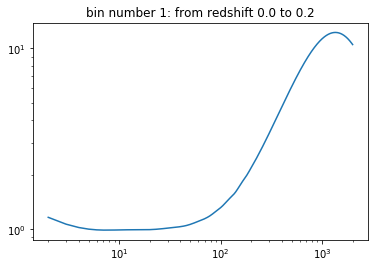

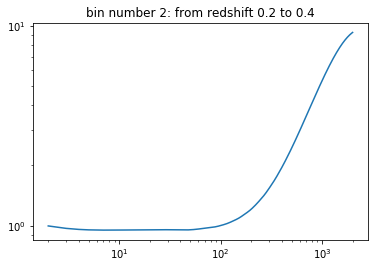

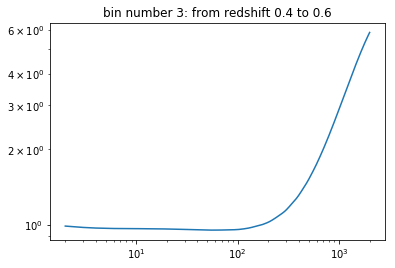

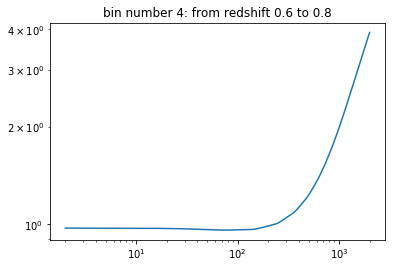

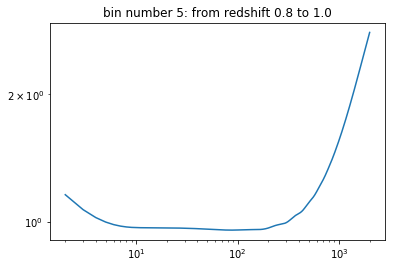

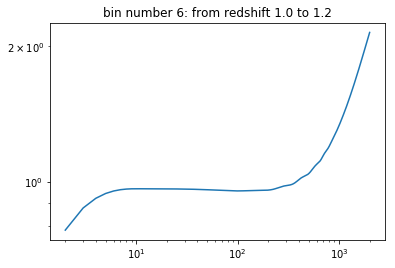

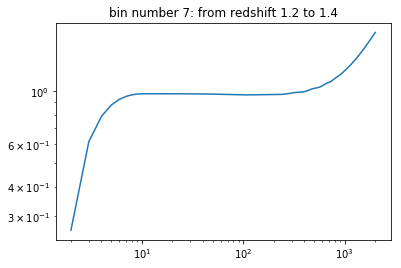

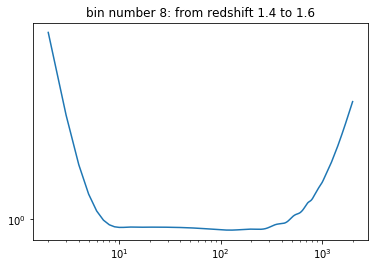

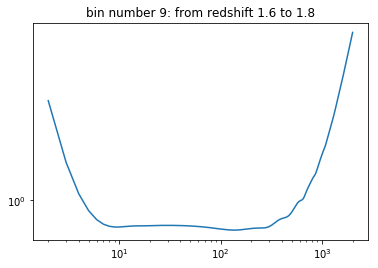

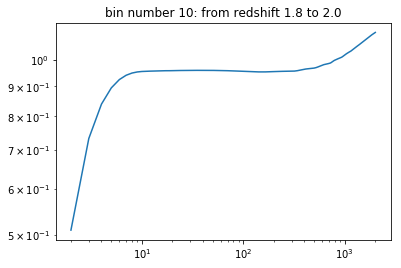

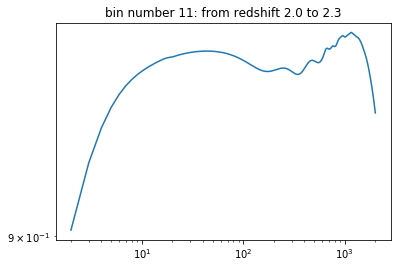

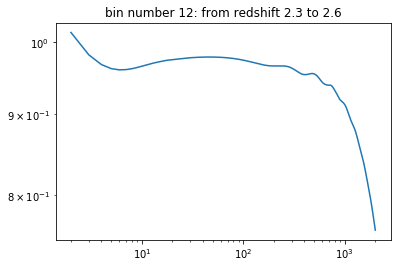

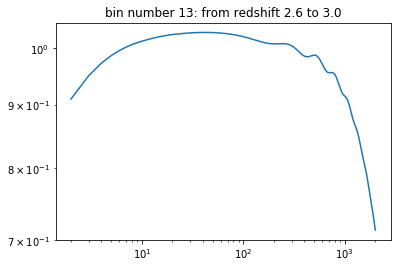

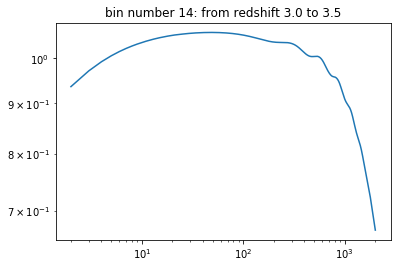

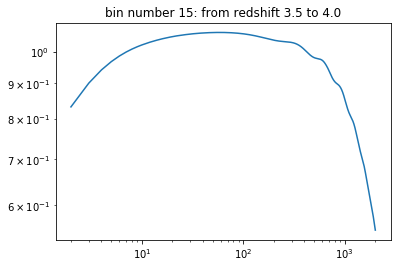

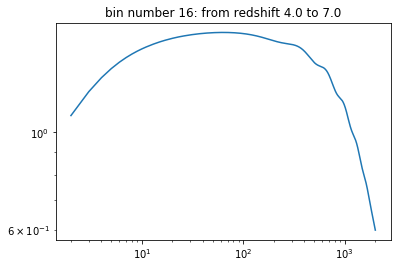

In [12]:
# ratios
plotEllMax = 2000
testElls = np.arange(2,plotEllMax)

for binNum in range(1,17):
    #plt.semilogy(testElls,Fobj2.crossCls[binNum,binNum,:plotEllMax-2]/clggOpti[:plotEllMax-2,binNum-1])
    plt.loglog(testElls,Fobj2.crossCls[binNum,binNum,:plotEllMax-2]/clggOpti[:plotEllMax-2,binNum-1])
    
    plt.title('bin number {0}: from redshift {1} to {2}'.format(binNum,binEdges[binNum-1],binEdges[binNum]))
    plt.show()

In [13]:
# test shot noise generator
#newNoise = True
newNoise = False
if newNoise:
    import noiseCl as ncl
    reload(ncl)

    nbar = 66
    binEdges = [0.0,0.5,1.0,2.0,3.0,4.0,7.0]
    #binEdges = np.linspace(Fobj2.zmin,Fobj2.zmax,Fobj2.nBins+1)
    N_gg = ncl.shotNoise(nbar,binEdges,myDNDZ=cp.modelDNDZ3,nz=100000,verbose=False)
    print N_gg


In [14]:
# adjust noise in Fobj2
if newNoise:
    for binNum in range(Fobj2.nBins):
        Fobj2.noiseCls[binNum+1,binNum+1] = N_gg[binNum]*np.ones(Fobj2.lmax-Fobj2.lmin+1)
        # or try with zero noise:
        #Fobj2.noiseCls[binNum+1,binNum+1] = N_gg[binNum]*np.zeros(Fobj2.lmax-Fobj2.lmin+1)
        # or try scaling by b**-1:
        #Fobj2.noiseCls[binNum+1,binNum+1] = N_gg[binNum]*np.ones(Fobj2.lmax-Fobj2.lmin+1)/Fobj2.binBs[binNum]
    Fobj2.covar,Fobj2.invCov,Fobj2.ells,Fobj2.obsList = \
        Fobj2.makeCovar(Fobj2.crossCls,Fobj2.noiseCls,Fobj2.lmin,Fobj2.lmax)
    Fobj2.Fij = Fobj2.makeFisher(Fobj2.lmin)
    print 'done.'

In [15]:
for i in range(1,7):
    print Fobj2.noiseCls[i][i][0]


7.002692161405672e-08
1.7567986372008835e-08
1.2250003048671448e-08
1.2098434618405746e-08
1.4192512722785633e-08
1.8446581971265137e-08


# Create $\chi(z)$ and $\ell_{max}(k_{max})$ functions

In [16]:
# MatterPower has a getChiOfZ function, but MatterPower object has been stripped from saved Fobj
# get params for MatterPower from FisherMatrix:
def getPk(Fobj):
    return cp.MatterPower(nz=Fobj.nz,AccuracyBoost=Fobj.AccuracyBoost,nonlinear=Fobj.nonlinear,**Fobj.cosParams)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)


print 'get nonlinear P(k)...'
myPk2 = getPk(Fobj2)
#print 'get linear P(k)...'
#myPk4 = getPk(Fobj4)

chiOfZ2 = myPk2.getChiofZ()
#chiOfZ4 = myPk4.getChiofZ()

# define bin edges
# the selection of beesBins must be consistent with that which was selected in cp.tophat
beesBins = True
if beesBins:
    if Fobj2.nBins == 6:
      binEdges = [0.0,0.5,1.0,2.0,3.0,4.0,7.0]
    elif Fobj2.nBins == 16:
      binEdges = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 
                  2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
    else:
      print '!!!!! wrong nBins for beesBins detected !!!!!'
      #return 0
else:
    binEdges = np.linspace(Fobj.zmin,Fobj.zmax,Fobj.nBins+1)
    
print 'redshift of bin edges: ',binEdges
binCenters = (np.array(binEdges[1:])+np.array(binEdges[:-1]))/2
print 'redshift of bin centers: ',binCenters

print 'Chi of bin edges (nonlin): ',chiOfZ2(binEdges)
#print 'Chi of bin edges (linear): ',chiOfZ4(binEdges)

print 'Chi of bin centers (nonlin): ',chiOfZ2(binCenters)
#print 'Chi of bin centers (linear): ',chiOfZ4(binCenters)


get nonlinear P(k)...
neutrino_hierarchy =  degenerate
starting makePkInterp.


finishing makePkInterp.
redshift of bin edges:  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.3, 2.6, 3.0, 3.5, 4.0, 7.0]
redshift of bin centers:  [0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.15 2.45 2.8  3.25
 3.75 5.5 ]
Chi of bin edges (nonlin):  [   0.          845.50395858 1603.54952098 2276.99544847 2873.32758176
 3401.79011072 3871.63120838 4291.26181815 4667.97781886 5007.95268441
 5316.35643872 5728.99676806 6091.79716576 6513.17408605 6961.13976856
 7341.61485851 8822.44868898]
Chi of bin centers (nonlin):  [ 433.58837117 1235.4289948  1950.44919026 2584.23819456 3145.45137055
 3643.48738618 4087.24043092 4484.57269281 4842.2119106  5165.8130596
 5529.56260603 5916.01241458 6310.48520307 6746.76864429 7158.7400969
 8209.85894406]


In [17]:
# copied from above
reload(cp)
def getWin(Fobj,myPk):
    return cp.Window(myPk,zmin=Fobj.zmin,zmax=Fobj.zmax,nBins=Fobj.nBins,
               biasK=cp.ones,biasG=cp.byeBias,dndzMode=Fobj.dndzMode,z0=Fobj.z0,
               doNorm=Fobj.doNorm,useWk=Fobj.useWk,BPZ=Fobj.BPZ,binSmooth=Fobj.binSmooth,
               biasByBin=Fobj.biasByBin)


# get window object for testing
myWin2 = getWin(Fobj2,myPk2)

print 'done.'

calculating window  0 ... 
normalizedDNDZ:  [0.00000000e+00 3.49324385e-05 6.98648770e-05 ... 6.69003972e-08
 6.68108424e-08 6.67212876e-08]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  0 , binBGs:  1.8999998602538521
calculating window  1 ... 
normalizedDNDZ:  [0.         0.00117393 0.00234785 ... 0.         0.         0.        ]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  1 , binBGs:  1.1458420962639153
calculating window  2 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  2 , binBGs:  1.313321494746786
calculating window  3 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGofZ:  [1.        1.0004375 1.000875  ... 7.999125  7.9995625 8.       ]
deltaZ:  0.0004375
binNum:  3 , binBGs:  1.5057510000145307
calculating window  4 ... 
normalizedDNDZ:  [0. 0. 0. ... 0. 0. 0.]
bGof

0.0 7 16 2


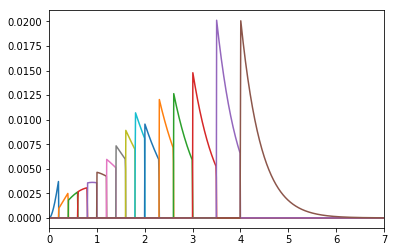

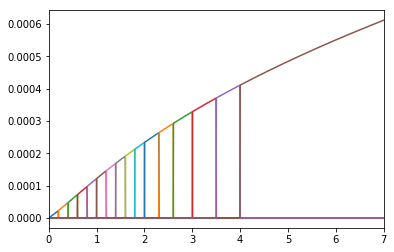

In [18]:
"""
      cor1,cor2: the names of the two fields to cross-correlate
        must be Window.kappa or Window.galaxies

"""
print myWin2.zmin,myWin2.zmax,myWin2.nBins,myWin2.dndzMode

# plot galaxy windows
zs = np.linspace(0,7,1000)
for binNum in range(1,myWin2.nBins+1):
    galWinFunc = cp.Window.galaxies(myWin2,binNum)
    win = galWinFunc(zs)
    plt.plot(zs,win)
plt.xlim([0,7])
#plt.xlim([1,2])
plt.show()

# plot kappa windows
#zs = np.linspace(0,7,1000)
for binNum in range(1,myWin2.nBins+1):
    kapWinFunc = cp.Window.kappa(myWin2,binNum)
    win = kapWinFunc(zs)
    plt.plot(zs,win)
plt.xlim([0,7])
#plt.xlim([1,2])
plt.show()


In [19]:
# lmax(kmax) function moved to within getKlimited function below

In [20]:
#reload(cp)
#zmin=0;zmax=2
#cp.plotDNDZM(binned=False,zmin=zmin,zmax=zmax)
#cp.plotDNDZM(binned=True,zmin=zmin,zmax=zmax)
#cp.plotDNDZM(binned=False,zmin=zmin,zmax=zmax,gold=True)
#cp.plotDNDZM(binned=True,zmin=zmin,zmax=zmax,gold=True)

In [21]:
# from getKLimited (below), modified for bin centers and chiOfZ2:
# create lmax function via the Limber approximation
myLmax = lambda kmax: np.floor(kmax*chiOfZ2(binCenters)-0.5).astype(int)
lmaxByBin1 = myLmax(0.1)
lmaxByBin2 = myLmax(0.2)

print 'lmaxByBin1: ',lmaxByBin1
print 'lmaxByBin2: ',lmaxByBin2

lmaxByBin1:  [ 42 123 194 257 314 363 408 447 483 516 552 591 630 674 715 820]
lmaxByBin2:  [  86  246  389  516  628  728  816  896  967 1032 1105 1182 1261 1348
 1431 1641]


In [22]:
# above 30 in lowest bin in both cases.  Great.

# Break apart covar and dClVecs as observables drop out

In [23]:
# set the kmax values used throughout

#kmax1 = 0.05  # don't go below this or bin 2 will have less than 50 ells and crash program
#kmax2 = 0.075

#kmax1 = 0.1
#kmax2 = 0.2

#kmax1 = 1.0
#kmax2 = 2.0  # no need to go above this since it is high enough to only kill bin1

# write them in terms of parameter h
hubble = Fobj2.H0/100
print 'h = ',hubble

kmax2 = 0.3*hubble
kmax1 = kmax2*0.5
print 'kmax1 = ',kmax1
print 'kmaz2 = ',kmax2

h =  0.674924737938
kmax1 =  0.101238710691
kmaz2 =  0.202477421382


In [24]:
# some helper functions for getKlimited, getKZlimited

# define row,col deleting function
def fixParam(Fij,pNum):
    return np.delete(np.delete(Fij,pNum,0),pNum,1)

# define the covar cutting function
def covarCut(covar,dClVecs,preMask,cutNum,verbose=True):
    """
    Purpose:
        produce covar and dClVecs with fewer observables
    Inputs:
        covar,dClVecs: like in Fobj
        preMask: this is a 1d array of binNumbers, 
          indicating which is the lowest bin number used for each row, col of covar 
          and each dClVec
        cutNum: a number contained in preMask indicating which rows, cols of covar, dClVecs to cut
    Returns:
        cut versions of covar,dClVecs,preMask
    """
    #toCut = np.flip(np.where(preMask[0]==cutNum),1)
    toCut = np.flip(np.where(preMask==cutNum),1) # removed 2nd dim of preMask since not needed
    if verbose:
        print 'to cut: ',toCut
    for cut in toCut:
        covar = fixParam(covar,cut)
        #preMask = fixParam(preMask,cut)
        preMask = np.delete(preMask,cut,0)
        dClVecs = np.delete(dClVecs,cut,0)
    if verbose:
        print 'covar.shape: ',covar.shape,', dClVecs.shape: ',dClVecs.shape
        print 'premask: ',preMask
    return covar,dClVecs,preMask


# check effect of dropping bin 1

In [25]:
# check effect of dropping bin 1
# first define local makeFisher function
# (copied from below; don't really need both.)
def makeFij(dClVecs,invCov,nParams):
    """
    This may replace the previous makeFisher function... blah blah blah.
    Inputs:
        all must have same ell range.  All ell values will be summed over.
    """
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      dClVec_i = dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = dClVecs[:,j,:] # shape (nCls,nElls)
        # here is the summation over ell:
        for ellInd in range(invCov.shape[2]):
          #print dClVec_i.shape,invCov.shape,dClVec_j.shape
          fij = np.dot(dClVec_i[:,ellInd],np.dot(invCov[:,:,ellInd],dClVec_j[:,ellInd]))
          #if ellInd == 100:
            #print 'i,j: ',i,j
            #print 'f_ij: ',fij
            #print 'dClVec_i: ',dClVec_i[:,ellInd]
            #print 'invCov: ',invCov[:,:,ellInd]
            #print 'dClVec_j: ',dClVec_j[:,ellInd]
          Fij[i,j] += fij
    return Fij


In [26]:
# get pieces of Fobj2 for making Fij
dClVecs2 = Fobj2.dClVecs
covar2 = Fobj2.covar

invCov2 = np.transpose(np.linalg.inv(np.transpose(covar2)))
myLmin = 30
#myLmin = 50
#myLmin = 70
lmin = Fobj2.lmin #2
myLmax = 2000
print dClVecs2.shape
print invCov2.shape

(153, 25, 2999)
(153, 153, 2999)


In [27]:
# trim the bottom and get Fij
dClVecs50 = dClVecs2[:,:,myLmin-lmin:myLmax-lmin]
invCov50 = invCov2[:,:,myLmin-lmin:myLmax-lmin]
Fij50 = makeFij(dClVecs50,invCov50,Fobj2.nParams)

In [28]:
# this function also doubled from below
def getSigmas(Fij):
    #print np.diag(np.linalg.inv(Fij))
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
 
sigmas50 = getSigmas(Fij50)

In [29]:
# excise bin 1 and repeat Fij, sigmas calc.
#print Fobj.obsList
nMaps = Fobj2.nBins + 1
map1List = np.floor(Fobj2.obsList/nMaps)
map2List = Fobj2.obsList%nMaps
print 'map i numbers: ',map1List
print 'map j numbers: ',map2List

map i numbers:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.  9.  9.  9. 10.
 10. 10. 10. 10. 10. 10. 11. 11. 11. 11. 11. 11. 12. 12. 12. 12. 12. 13.
 13. 13. 13. 14. 14. 14. 15. 15. 16.]
map j numbers:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  1.
  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  2.  3.  4.
  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.  3.  4.  5.  6.  7.  8.
  9. 10. 11. 12. 13. 14. 15. 16.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.
 14. 15. 16.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 1

In [30]:
whereOnes = [12,11,10,9,8,7,1]
preMaskOne = np.zeros((28))
preMaskOne[whereOnes] = 1
print preMaskOne
print map1List[whereOnes]
print map2List[whereOnes]
toCut = 1
covarOne,dClVecsOne,preMaskOne = covarCut(covar2.copy(),dClVecs2.copy(),preMaskOne,toCut)
print 'done.'

[0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0.]
[12. 11. 10.  9.  8.  7.  1.]
to cut:  [[12 11 10  9  8  7  1]]
covar.shape:  (146, 146, 2999) , dClVecs.shape:  (146, 25, 2999)
premask:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
done.


In [31]:
invCovOne = np.transpose(np.linalg.inv(np.transpose(covarOne)))
dClVecs50B = dClVecsOne[:,:,myLmin-lmin:myLmax-lmin]
invCov50B = invCovOne[:,:,myLmin-lmin:myLmax-lmin]
Fij50B = makeFij(dClVecs50B,invCov50B,Fobj2.nParams)

In [32]:
print Fij50B[:,9]
# again, copied from below
def fixParam(Fij,pNum):
        return np.delete(np.delete(Fij,pNum,0),pNum,1)
Fij50B = fixParam(Fij50B,9)
sigmas50B = getSigmas(Fij50B)

[-5.03725355e+07  3.20318668e+07  1.06628395e+09  1.79091323e+15
  6.21045375e+06 -1.25951876e+02 -2.02447531e+06 -1.72579289e+06
 -5.50485703e+05  5.50202647e+06  9.48723724e+00  1.03124397e+01
  1.09024855e+01  1.20474298e+01  1.34256731e+01  5.26305744e+02
  4.48190910e+02  3.75200923e+02  3.08839594e+02  3.50655726e+02
  2.41057010e+02  6.61303213e+01  6.75579095e+01  3.81826319e+01
  1.82442798e+01]


In [33]:
from prettytable import PrettyTable

print 'with bin1, and without bin1'
t = PrettyTable(['Parameter','sigmas_yes_bin1','sigmas_no_bin1','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas50[i]
    Bi = sigmas50B[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


with bin1, and without bin1
+---------------+-----------------+----------------+---------------+
|   Parameter   | sigmas_yes_bin1 | sigmas_no_bin1 | percent diff. |
+---------------+-----------------+----------------+---------------+
|     ombh2     |     0.000472    |    0.000464    |     -1.68     |
|     omch2     |     0.00113     |    0.00099     |     -12.4     |
| cosmomc_theta |     1.45e-05    |    1.37e-05    |     -5.72     |
|       As      |     1.88e-11    |    1.64e-11    |     -12.8     |
|       ns      |     0.00286     |    0.00163     |     -42.8     |
|      tau      |       1.72      |       1.3      |     -24.2     |
|      mnu      |      0.0185     |     0.018      |      -2.7     |
|       w       |      0.0124     |     0.0108     |     -13.1     |
|       wa      |      0.0235     |     0.0241     |      2.27     |
+---------------+-----------------+----------------+---------------+


In [34]:
# ok, that increased uncertainties, as expected.
# Also, sigmas_no_bin1 is the same result as with ketKlimited(kmax=5), which also just excises bin1.

# Define function for creating blocks for making Fij

In [35]:
# Define function for creating blocks for making Fij
def getKlimited(binEdges,chiOfZ,Fobj,kmax=0.1,kgLmax=2000,centers=True,galaxiesOnly=False):
    """
    Purpose:
        Chop up Fobj.covar and Fobj.dClVecs into blocks that correspond to having ell values
          below ell(k_max,low_z_bin_edge) in Limber approximation
    Inputs:
        binEdges: an array of redshifts indicating the edges of the redshift bins
        chiOfZ: a distance-redshift relation function chi(z)
        Fobj: FisherMatrix object
        kmax: set the limit that controls the lmax of each redshift bin via Limber appx
          default: 0.1
        kgLmax: ell_max value for k,g
          default: 2000
        centers: set to True to indicate that the values in binEdges are actually bin centers
          default: True
        galaxiesOnly: set to True to cut out the kk, kg parts and return gg only
          default: False
    Uses:
        fixParam: defined above
        covarCut: defined above
    Returns:
        covarBins,dClVecsBins: lists of covar and dClVecs arrays to be used for making Fisher matrix
        lmaxByBin: the ell value for each ell-block edge 
          There will be nBins+2 if centers==True, else nBins+1
        preMaskBins: list of one dimensional masks containing minimum bin numbers for covarBins,dClVecsBins
    """
    # create lmax function via the Limber approximation
    myLmax = lambda kmax: np.floor(kmax*chiOfZ(binEdges)-0.5).astype(int)
    lmaxByBin = myLmax(kmax) # gives array of lmax at lower bin edges (or centers)
    # the -1 is from the -0.5 in the Limber approximation put into the floor function

    # modify this for use in looping below
    lmin = Fobj.lmin
    if centers: # lmaxByBin elements are at bin centers; need to add endpoints for blocks
        lmaxByBin = np.append(Fobj2.lmin,np.append(lmaxByBin,kgLmax))
    else: # lmaxByBin elements are at bin edges, use these for endpoints for blocks
        lmaxByBin[0] = Fobj.lmin
        if lmaxByBin[-1] < kgLmax: 
            lmaxByBin[-1] = kgLmax  # this extends the last bin out to lmax, and this bin is kappa-only
            # >= kgLmax case taken care of below
    print 'kmax = ',kmax,': lmax = ',lmaxByBin
    
    # get codes describing observables
    nBins = Fobj.nBins
    nMaps = Fobj.nBins+1
    print 'obs names: ',Fobj.obsNames
    #print Fobj.obsList
    map1List = np.floor(Fobj.obsList/nMaps)
    map2List = Fobj.obsList%nMaps
    print 'map i numbers: ',map1List
    print 'map j numbers: ',map2List

    print 'invCov shape: ',Fobj.invCov.shape, 'number of observables: ',Fobj.obsList.shape[0]
    print 'lmin, lmax for k,g summation: ',lmin,kgLmax

    # create mask for covariance matrix to be applied to implement lmax
    mSize = Fobj.obsList.__len__()
    preMask = np.zeros((mSize,mSize)) # contains lowest bin number (>0) of 4 used in covar
    print 'preMask shape: ',preMask.shape
    for i in range(mSize):
        for j in range(i,mSize):
            myMaps = np.array([map1List[i],map1List[j],map2List[i],map2List[j]])        
            if i>0 or j>0:
                preMask[i,j] = np.min(myMaps[np.where(myMaps>0)])
                preMask[j,i] = preMask[i,j]
            else:
                preMask[0,0] = 0
            #print i,j,myMaps, myMaps[np.where(myMaps>0)], preMask[i,j]
    preMask = preMask.astype(int)
    print preMask#[0]
    
    covar=Fobj.covar
    dClVecs=Fobj.dClVecs
    preMaskLine = preMask[0] # modified to use just the first line
    
    verbose = True
    if galaxiesOnly:
        # kk and kg is at the beginning of each
        # cut all kg now, ignore kk at the end
        for cutNum in range(nBins):
            #covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,1,verbose=verbose)
            covar = fixParam(covar,1)
            preMaskLine = np.delete(preMaskLine,1,0)
            dClVecs = np.delete(dClVecs,1,0)
        #covar = covar[nBins+1:,nBins+1:]
        #dClVecs = dClVecs[nBins+1:]
        #preMask = preMask[nBins+1:,nBins+1:]
        print 'galaxiesOnly = True: kappa-g has been removed.'
    print 'preMaskLine: ',preMaskLine
    print 'covar shape: ',covar.shape
    print 'dClVecs shape: ',dClVecs.shape
        
    # cut out all covar,dClVecs,preMask elements with row/col of 1s below lmaxByBin[0] = -1 : so all the way to lmin.

    # prepare containers for the results
    covarBins = []
    dClVecsBins = []
    preMaskBins = []

    # iterate as bins are removed
    myEllMin = lmaxByBin[0]
    myEllMax = lmaxByBin[1]
    lastBlock = False # for stopping iteration if myEllMax is below kgLmax
    if centers:
        nBlocks = nBins+1
    else: 
        nBlocks = nBins
        
    for blockNum in range(nBlocks): 
        print '\nstarting blockNum {0} of {1}...'.format(blockNum+1,nBlocks)
        
        if not centers: # cut bins not needed for this block
            covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,blockNum+1,verbose=verbose)

        if lmaxByBin[blockNum+1] < kgLmax:
            myEllMin = lmaxByBin[blockNum]
            myEllMax = lmaxByBin[blockNum+1]
        else:
            if lmaxByBin[blockNum] < kgLmax:
                # prob. don't need this if here since only one endpoint will pass kgLmax then end the for loop
                myEllMin = lmaxByBin[blockNum]
            myEllMax = kgLmax
            lastBlock = True
            
        # create block-out
        if galaxiesOnly:  # 1: to remove kappa-kappa
            covarBins.append( covar[1:,1:,myEllMin-lmin:myEllMax-lmin] )
            dClVecsBins.append( dClVecs[1:,:,myEllMin-lmin:myEllMax-lmin] )
            preMaskBins.append( preMaskLine[1:].copy() )
        else:
            covarBins.append( covar[:,:,myEllMin-lmin:myEllMax-lmin] )
            dClVecsBins.append( dClVecs[:,:,myEllMin-lmin:myEllMax-lmin] )
            preMaskBins.append( preMaskLine.copy() )
        if galaxiesOnly and blockNum == nBlocks-2:
            print 'omitting kappa block.'
            lastBlock = True
        
        if centers and blockNum != nBins: # this cut has to be done after block-out
            covar,dClVecs,preMaskLine = covarCut(covar,dClVecs,preMaskLine,blockNum+1,verbose=verbose)
            
        print 'blockNum = ',blockNum,', covarBins.shape = ',covarBins[blockNum].shape,', dClVecsBins.shape = ',dClVecsBins[blockNum].shape
        if verbose:
            print 'covariance shape: ',covarBins[blockNum].shape
            print 'derivative array shape: ',dClVecsBins[blockNum].shape
            print r'bin $\ell_{{min}} = {0}$, bin $\ell_{{max}} = {1}$'.format(lmaxByBin[blockNum],lmaxByBin[blockNum+1]-1)
        if lastBlock:
            break # should break the for blockNum loop
            
    print 'done'  
    return covarBins,dClVecsBins,lmaxByBin,preMaskBins

# test it
doTest = True
#doTest = False
if doTest:
    kmax_t = kmax2
    #kmax_t = 5
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax_t)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax_t,
                                                                              centers=False)
    #covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax_t,
    #                                                                          centers=True)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax_t,
                                                                              centers=False,galaxiesOnly=True)
    #covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax_t,
    #                                                                          centers=True,galaxiesOnly=True)


starting nonlinear P(k), kmax = 0.202477421382...
kmax =  0.202477421382 : lmax =  [   2  170  324  460  581  688  783  868  944 1013 1075 1159 1232 1318
 1408 1486 2000]
obs names:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9', 'g1,g10', 'g1,g11', 'g1,g12', 'g1,g13', 'g1,g14', 'g1,g15', 'g1,g16', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g2,g7', 'g2,g8', 'g2,g9', 'g2,g10', 'g2,g11', 'g2,g12', 'g2,g13', 'g2,g14', 'g2,g15', 'g2,g16', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g3,g7', 'g3,g8', 'g3,g9', 'g3,g10', 'g3,g11', 'g3,g12', 'g3,g13', 'g3,g14', 'g3,g15', 'g3,g16', 'g4,g4', 'g4,g5', 'g4,g6', 'g4,g7', 'g4,g8', 'g4,g9', 'g4,g10', 'g4,g11', 'g4,g12', 'g4,g13', 'g4,g14', 'g4,g15', 'g4,g16', 'g5,g5', 'g5,g6', 'g5,g7', 'g5,g8', 'g5,g9', 'g5,g10', 'g5,g11', 'g5,g12', 'g5,g13', 'g5,g14', 'g5,g15', 'g5,g16', 'g6,g6', 

covar.shape:  (45, 45, 2999) , dClVecs.shape:  (45, 25, 2999)
premask:  [ 0  9 10 11 12 13 14 15 16  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  7 , covarBins.shape =  (45, 45, 76) , dClVecsBins.shape =  (45, 25, 76)
covariance shape:  (45, 45, 76)
derivative array shape:  (45, 25, 76)
bin $\ell_{min} = 868$, bin $\ell_{max} = 943$

starting blockNum 9 of 16...
to cut:  [[16 15 14 13 12 11 10  9  1]]
covar.shape:  (36, 36, 2999) , dClVecs.shape:  (36, 25, 2999)
premask:  [ 0 10 11 12 13 14 15 16 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12
 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  8 , covarBins.shape =  (36, 36, 69) , dClVecsBins.shape =  (36, 25, 69)
covariance shape:  (36, 36, 69)
derivative array shape:  (36, 25, 69)
bin $\ell_{min} = 944$, bin $\ell_{max} = 1012$

starting blockNum 10 of 16...
to cut:  [[14 13 12 11 10  9  8  1]]
covar.shape:  (28, 28, 2999) , dClVecs.shape:  (28, 25, 2999)
prem

covar.shape:  (92, 92, 2999) , dClVecs.shape:  (92, 25, 2999)
premask:  [ 0  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11
 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  2 , covarBins.shape =  (91, 91, 136) , dClVecsBins.shape =  (91, 25, 136)
covariance shape:  (91, 91, 136)
derivative array shape:  (91, 25, 136)
bin $\ell_{min} = 324$, bin $\ell_{max} = 459$

starting blockNum 4 of 16...
to cut:  [[13 12 11 10  9  8  7  6  5  4  3  2  1]]
covar.shape:  (79, 79, 2999) , dClVecs.shape:  (79, 25, 2999)
premask:  [ 0  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14 15 15 16]
blockNum =  3 , covarBins.shape =  (78, 78, 12

In [36]:
if doTest:
    print 'not galaxiesOnly:'
    print dClVecsBins2_01.__len__()
    #print invCovBins2_01.__len__()
    print covarBins2_01.__len__()

    for blockNum in range(dClVecsBins2_01.__len__()):
        print 'blockNum ',blockNum
        print 'dClVecs shape: ',dClVecsBins2_01[blockNum].shape
        #print 'invCovar shape: ',invCovBins2_01[blockNum].shape
        print 'covar shape: ',covarBins2_01[blockNum].shape
        print 'lmaxByBin: ',lmaxByBin2_01[blockNum]
        print 'preMaskBins: ',preMaskBins2_01[blockNum]
        
    print '\ngalaxiesOnly:'
    print dClVecsBins2_01g.__len__()
    #print invCovBins2_01g.__len__()
    print covarBins2_01g.__len__()

    for blockNum in range(dClVecsBins2_01g.__len__()):
        print 'blockNum ',blockNum
        print 'dClVecs shape: ',dClVecsBins2_01g[blockNum].shape
        #print 'invCovar shape: ',invCovBins2_01g[blockNum].shape
        print 'covar shape: ',covarBins2_01g[blockNum].shape
        print 'lmaxByBin: ',lmaxByBin2_01g[blockNum]
        print 'preMaskBins: ',preMaskBins2_01g[blockNum]


not galaxiesOnly:
16
16
blockNum  0
dClVecs shape:  (136, 25, 168)
covar shape:  (136, 136, 168)
lmaxByBin:  2
preMaskBins:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum  1
dClVecs shape:  (120, 25, 154)
covar shape:  (120, 120, 154)
lmaxByBin:  170
preMaskBins:  [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 1

In [37]:
# testing
if doTest:
    invCovOneC = np.transpose(np.linalg.inv(np.transpose(covarBins2_01[0])))
    dClVecs50C = dClVecsBins2_01[0][:,:,myLmin-lmin:myLmax-lmin]
    invCov50C = invCovOneC[:,:,myLmin-lmin:myLmax-lmin]
    Fij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)
    Fij50C = fixParam(Fij50C,9)
    sigmas50C = getSigmas(Fij50C)

    print 'without bin1'
    t = PrettyTable(['Parameter','sigmas_no_bin1B','sigmas_no_bin1C','percent diff.'])
    for i,p in enumerate(paramList[:nCosParams]):
        Zi = sigmas50B[i]
        Bi = sigmas50C[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t


without bin1
+---------------+-----------------+-----------------+---------------+
|   Parameter   | sigmas_no_bin1B | sigmas_no_bin1C | percent diff. |
+---------------+-----------------+-----------------+---------------+
|     ombh2     |     0.000464    |      0.0103     |    2.12e+03   |
|     omch2     |     0.00099     |      0.0351     |    3.44e+03   |
| cosmomc_theta |     1.37e-05    |      0.0004     |    2.83e+03   |
|       As      |     1.64e-11    |      6e-10      |    3.56e+03   |
|       ns      |     0.00163     |      0.102      |    6.13e+03   |
|      tau      |        1.3      |       46.5      |    3.47e+03   |
|      mnu      |      0.018      |      0.218      |    1.11e+03   |
|       w       |      0.0108     |      0.459      |    4.17e+03   |
|       wa      |      0.0241     |       1.32      |    5.4e+03    |
+---------------+-----------------+-----------------+---------------+


In [38]:
#centers = True
centers = False
if centers:
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers)
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)
    covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers)

    #print 'starting linear P(k), kmax = {0}...'.format(kmax1)
    #covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax1,
    #                                                                          centers=centers)
    #print 'starting linear P(k), kmax = {0}...'.format(kmax2)
    #covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax2,
    #                                                                          centers=centers)
else:
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)
    covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers)
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)
    covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers)

    #print 'starting linear P(k), kmax = {0}...'.format(kmax1)
    #covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1,
    #                                                                          centers=centers)
    #print 'starting linear P(k), kmax = {0}...'.format(kmax2)
    #covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2,
    #                                                                          centers=centers)
    
print 'done with all 4 cases.'

starting nonlinear P(k), kmax = 0.101238710691...
kmax =  0.101238710691 : lmax =  [   2   85  161  230  290  343  391  433  472  506  537  579  616  658
  704  742 2000]
obs names:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9', 'g1,g10', 'g1,g11', 'g1,g12', 'g1,g13', 'g1,g14', 'g1,g15', 'g1,g16', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g2,g7', 'g2,g8', 'g2,g9', 'g2,g10', 'g2,g11', 'g2,g12', 'g2,g13', 'g2,g14', 'g2,g15', 'g2,g16', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g3,g7', 'g3,g8', 'g3,g9', 'g3,g10', 'g3,g11', 'g3,g12', 'g3,g13', 'g3,g14', 'g3,g15', 'g3,g16', 'g4,g4', 'g4,g5', 'g4,g6', 'g4,g7', 'g4,g8', 'g4,g9', 'g4,g10', 'g4,g11', 'g4,g12', 'g4,g13', 'g4,g14', 'g4,g15', 'g4,g16', 'g5,g5', 'g5,g6', 'g5,g7', 'g5,g8', 'g5,g9', 'g5,g10', 'g5,g11', 'g5,g12', 'g5,g13', 'g5,g14', 'g5,g15', 'g5,g16', 'g6,g6', 

covar.shape:  (45, 45, 2999) , dClVecs.shape:  (45, 25, 2999)
premask:  [ 0  9 10 11 12 13 14 15 16  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  7 , covarBins.shape =  (45, 45, 39) , dClVecsBins.shape =  (45, 25, 39)
covariance shape:  (45, 45, 39)
derivative array shape:  (45, 25, 39)
bin $\ell_{min} = 433$, bin $\ell_{max} = 471$

starting blockNum 9 of 16...
to cut:  [[16 15 14 13 12 11 10  9  1]]
covar.shape:  (36, 36, 2999) , dClVecs.shape:  (36, 25, 2999)
premask:  [ 0 10 11 12 13 14 15 16 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12
 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  8 , covarBins.shape =  (36, 36, 34) , dClVecsBins.shape =  (36, 25, 34)
covariance shape:  (36, 36, 34)
derivative array shape:  (36, 25, 34)
bin $\ell_{min} = 472$, bin $\ell_{max} = 505$

starting blockNum 10 of 16...
to cut:  [[14 13 12 11 10  9  8  1]]
covar.shape:  (28, 28, 2999) , dClVecs.shape:  (28, 25, 2999)
prema

covar.shape:  (105, 105, 2999) , dClVecs.shape:  (105, 25, 2999)
premask:  [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
blockNum =  2 , covarBins.shape =  (105, 105, 136) , dClVecsBins.shape =  (105, 25, 136)
covariance shape:  (105, 105, 136)
derivative array shape:  (105, 25, 136)
bin $\ell_{min} = 324$, bin $\ell_{max} = 459$

starting blockNum 4 of 16...
to cut:  [[26 25 24 23 22 21 20 19 18 17 16 15 14  1]]
covar.shape:  (91, 91, 2999) , dClVecs.shape:  (91, 25, 2999)
premask:  [ 0  5  6  7  8  9 10 11 12 13 14 15 16  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 1

In [39]:
# same for galaxies-only case:
if centers:
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)
    covarBins2_02g,dClVecsBins2_02g,lmaxByBin2_02g,preMaskBins2_02g = getKlimited(binCenters,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)

    #print 'starting linear P(k), kmax = {0}...'.format(kmax1)
    #covarBins4_01g,dClVecsBins4_01g,lmaxByBin4_01g,preMaskBins4_01g = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax1,
    #                                                                          centers=centers,galaxiesOnly=True)
    #print 'starting linear P(k), kmax = {0}...'.format(kmax2)
    #covarBins4_02g,dClVecsBins4_02g,lmaxByBin4_02g,preMaskBins4_02g = getKlimited(binCenters,chiOfZ4,Fobj4,kmax=kmax2,
    #                                                                          centers=centers,galaxiesOnly=True)
else:
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)
    covarBins2_01g,dClVecsBins2_01g,lmaxByBin2_01g,preMaskBins2_01g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1,
                                                                              centers=centers,galaxiesOnly=True)
    print 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)
    covarBins2_02g,dClVecsBins2_02g,lmaxByBin2_02g,preMaskBins2_02g = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2,
                                                                              centers=centers,galaxiesOnly=True)

    #print 'starting linear P(k), kmax = {0}...'.format(kmax1)
    #covarBins4_01g,dClVecsBins4_01g,lmaxByBin4_01g,preMaskBins4_01g = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1,
    #                                                                          centers=centers,galaxiesOnly=True)
    #print 'starting linear P(k), kmax = {0}...'.format(kmax2)
    #covarBins4_02g,dClVecsBins4_02g,lmaxByBin4_02g,preMaskBins4_02g = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2,
    #                                                                          centers=centers,galaxiesOnly=True)
    
print 'done with all 4 cases.'

starting nonlinear P(k), kmax = 0.101238710691...
kmax =  0.101238710691 : lmax =  [   2   85  161  230  290  343  391  433  472  506  537  579  616  658
  704  742 2000]
obs names:  ['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'k,g7', 'k,g8', 'k,g9', 'k,g10', 'k,g11', 'k,g12', 'k,g13', 'k,g14', 'k,g15', 'k,g16', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g1,g7', 'g1,g8', 'g1,g9', 'g1,g10', 'g1,g11', 'g1,g12', 'g1,g13', 'g1,g14', 'g1,g15', 'g1,g16', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g2,g7', 'g2,g8', 'g2,g9', 'g2,g10', 'g2,g11', 'g2,g12', 'g2,g13', 'g2,g14', 'g2,g15', 'g2,g16', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g3,g7', 'g3,g8', 'g3,g9', 'g3,g10', 'g3,g11', 'g3,g12', 'g3,g13', 'g3,g14', 'g3,g15', 'g3,g16', 'g4,g4', 'g4,g5', 'g4,g6', 'g4,g7', 'g4,g8', 'g4,g9', 'g4,g10', 'g4,g11', 'g4,g12', 'g4,g13', 'g4,g14', 'g4,g15', 'g4,g16', 'g5,g5', 'g5,g6', 'g5,g7', 'g5,g8', 'g5,g9', 'g5,g10', 'g5,g11', 'g5,g12', 'g5,g13', 'g5,g14', 'g5,g15', 'g5,g16', 'g6,g6', 

covar.shape:  (29, 29, 2999) , dClVecs.shape:  (29, 25, 2999)
premask:  [ 0 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14
 14 14 15 15 16]
blockNum =  8 , covarBins.shape =  (28, 28, 34) , dClVecsBins.shape =  (28, 25, 34)
covariance shape:  (28, 28, 34)
derivative array shape:  (28, 25, 34)
bin $\ell_{min} = 472$, bin $\ell_{max} = 505$

starting blockNum 10 of 16...
to cut:  [[7 6 5 4 3 2 1]]
covar.shape:  (22, 22, 2999) , dClVecs.shape:  (22, 25, 2999)
premask:  [ 0 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  9 , covarBins.shape =  (21, 21, 31) , dClVecsBins.shape =  (21, 25, 31)
covariance shape:  (21, 21, 31)
derivative array shape:  (21, 25, 31)
bin $\ell_{min} = 506$, bin $\ell_{max} = 536$

starting blockNum 11 of 16...
to cut:  [[6 5 4 3 2 1]]
covar.shape:  (16, 16, 2999) , dClVecs.shape:  (16, 25, 2999)
premask:  [ 0 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  10 , covarBins.shape =  (15, 15, 42) , dClVecsBi

covar.shape:  (79, 79, 2999) , dClVecs.shape:  (79, 25, 2999)
premask:  [ 0  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14 15 15 16]
blockNum =  3 , covarBins.shape =  (78, 78, 121) , dClVecsBins.shape =  (78, 25, 121)
covariance shape:  (78, 78, 121)
derivative array shape:  (78, 25, 121)
bin $\ell_{min} = 460$, bin $\ell_{max} = 580$

starting blockNum 5 of 16...
to cut:  [[12 11 10  9  8  7  6  5  4  3  2  1]]
covar.shape:  (67, 67, 2999) , dClVecs.shape:  (67, 25, 2999)
premask:  [ 0  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
blockNum =  4 , covarBins.shape =  (66, 66, 107) , dClVecsBins.shape =  (66, 25, 107)
covariance shape:  (66, 66, 107)
deriva

# Get inverse covariance matrices

In [40]:
# get inverse covariance matrices
def getInvArray(covarBins):
    invCovBins = []
    nBlocks = covarBins.__len__()
    for binNum in range(nBlocks):
        invCovBins.append( np.transpose(np.linalg.inv(np.transpose(covarBins[binNum]))) )
    return invCovBins

invCovBins2_01 = getInvArray(covarBins2_01)
invCovBins2_02 = getInvArray(covarBins2_02)
#invCovBins4_01 = getInvArray(covarBins4_01)
#invCovBins4_02 = getInvArray(covarBins4_02)
#print 'done'

# galaxies only cases
invCovBins2_01g = getInvArray(covarBins2_01g)
invCovBins2_02g = getInvArray(covarBins2_02g)
#invCovBins4_01g = getInvArray(covarBins4_01g)
#invCovBins4_02g = getInvArray(covarBins4_02g)
print 'done'

done


In [41]:
# cut to myLmin in first bin
#myLmin = 30
minEllInd = myLmin-Fobj2.lmin

dClVecsBins2_01[0] = dClVecsBins2_01[0][:,:,minEllInd:]
covarBins2_01[0]  =  covarBins2_01[0][:,:,minEllInd:]
invCovBins2_01[0]  =  invCovBins2_01[0][:,:,minEllInd:]
dClVecsBins2_02[0] = dClVecsBins2_02[0][:,:,minEllInd:]
covarBins2_02[0]  =  covarBins2_02[0][:,:,minEllInd:]
invCovBins2_02[0]  =  invCovBins2_02[0][:,:,minEllInd:]

#dClVecsBins4_01[0] = dClVecsBins4_01[0][:,:,minEllInd:]
#covarBins4_01[0]  =  covarBins4_01[0][:,:,minEllInd:]
#invCovBins4_01[0]  =  invCovBins4_01[0][:,:,minEllInd:]
#dClVecsBins4_02[0] = dClVecsBins4_02[0][:,:,minEllInd:]
#covarBins4_02[0]  =  covarBins4_02[0][:,:,minEllInd:]
#invCovBins4_02[0]  =  invCovBins4_02[0][:,:,minEllInd:]

# galaxies only cases

dClVecsBins2_01g[0] = dClVecsBins2_01g[0][:,:,minEllInd:]
covarBins2_01g[0]  =  covarBins2_01g[0][:,:,minEllInd:]
invCovBins2_01g[0]  =  invCovBins2_01g[0][:,:,minEllInd:]
dClVecsBins2_02g[0] = dClVecsBins2_02g[0][:,:,minEllInd:]
covarBins2_02g[0]  =  covarBins2_02g[0][:,:,minEllInd:]
invCovBins2_02g[0]  =  invCovBins2_02g[0][:,:,minEllInd:]

#dClVecsBins4_01g[0] = dClVecsBins4_01g[0][:,:,minEllInd:]
#covarBins4_01g[0]  =  covarBins4_01g[0][:,:,minEllInd:]
#invCovBins4_01g[0]  =  invCovBins4_01g[0][:,:,minEllInd:]
#dClVecsBins4_02g[0] = dClVecsBins4_02g[0][:,:,minEllInd:]
#covarBins4_02g[0]  =  covarBins4_02g[0][:,:,minEllInd:]
#invCovBins4_02g[0]  =  invCovBins4_02g[0][:,:,minEllInd:]

print 'done.'

done.


# Assemble the $F_{ij}$ matrices and add them up

In [42]:
def makeFij(dClVecs,invCov,nParams):
    """
    This may replace the previous makeFisher function... blah blah blah.
    Inputs:
        all must have same ell range.  All ell values will be summed over.
    """
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    for i in range(nParams):
      dClVec_i = dClVecs[:,i,:] # shape (nCls,nElls)
      for j in range(nParams):
        dClVec_j = dClVecs[:,j,:] # shape (nCls,nElls)
        # here is the summation over ell:
        for ellInd in range(invCov.shape[2]):
          #print dClVec_i.shape,invCov.shape,dClVec_j.shape
          fij = np.dot(dClVec_i[:,ellInd],np.dot(invCov[:,:,ellInd],dClVec_j[:,ellInd]))
          Fij[i,j] += fij
    return Fij


In [43]:
# define row,col deleting function
#def fixParam(Fij,pNum):
#        return np.delete(np.delete(Fij,pNum,0),pNum,1)

In [44]:
# assemble the avengers
#def getFijSum(nParams,nBins,dClVecsBins,invCovBins,Fij_kk,paramList):
def getFijSum(nParams,nBins,dClVecsBins,invCovBins,paramList,centers=False):
    """
    Inputs:
    
    Returns:
    
    """
    Fij = np.zeros((nParams,nParams)) # indices match those in paramList
    nBlocks = dClVecsBins.__len__()
    nBlocks2 = invCovBins.__len__()
    print 'nBlocks: ',nBlocks,', nBlocks2: ',nBlocks2
    for binNum in range(nBlocks):
        print binNum, dClVecsBins[binNum].size,dClVecsBins[binNum].shape,invCovBins[binNum].shape
        Fij += makeFij(dClVecsBins[binNum],invCovBins[binNum],nParams)

    # add the low-ell kappa-only part (high ell part was binNum = nBins-1)
    nCosParams = nParams-nBins
    #Fij[:nCosParams,:nCosParams] += Fij_kk
    
    if not centers:
        # cut out bin1 from Fij and paramList since it was never used
        Fij = fixParam(Fij,nCosParams)
        myParamList = np.delete(paramList,nCosParams,0)

    print myParamList
    #print Fij
    return Fij,myParamList

#Fij2_01,paramList2_01 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fij_kk2_01,Fobj2.paramList)
#Fij2_02,paramList2_02 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02,invCovBins2_02,Fij_kk2_02,Fobj2.paramList)
#Fij4_01,paramList4_01 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01,invCovBins4_01,Fij_kk4_01,Fobj4.paramList)
#Fij4_02,paramList4_02 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02,invCovBins4_02,Fij_kk4_02,Fobj4.paramList)
Fij2_01,paramList2_01 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01,invCovBins2_01,Fobj2.paramList,
                                  centers=centers)
Fij2_02,paramList2_02 = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02,invCovBins2_02,Fobj2.paramList,
                                  centers=centers)
#Fij4_01,paramList4_01 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01,invCovBins4_01,Fobj4.paramList,
#                                  centers=centers)
#Fij4_02,paramList4_02 = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02,invCovBins4_02,Fobj4.paramList,
#                                  centers=centers)
print 'done.'

nBlocks:  16 , nBlocks2:  16
0 187000 (136, 25, 55) (136, 136, 55)
1 228000 (120, 25, 76) (120, 120, 76)
2 181125 (105, 25, 69) (105, 105, 69)
3 136500 (91, 25, 60) (91, 91, 60)
4 103350 (78, 25, 53) (78, 78, 53)
5 79200 (66, 25, 48) (66, 66, 48)
6 57750 (55, 25, 42) (55, 55, 42)
7 43875 (45, 25, 39) (45, 45, 39)
8 30600 (36, 25, 34) (36, 36, 34)
9 21700 (28, 25, 31) (28, 28, 31)
10 22050 (21, 25, 42) (21, 21, 42)
11 13875 (15, 25, 37) (15, 15, 37)
12 10500 (10, 25, 42) (10, 10, 42)
13 6900 (6, 25, 46) (6, 6, 46)
14 2850 (3, 25, 38) (3, 3, 38)
15 31450 (1, 25, 1258) (1, 1, 1258)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
nBlocks:  16 , nBlocks2:  16
0 476000 (136, 25, 140) (136, 136, 140)
1 462000 (120, 25, 154) (120, 120, 154)
2 357000 (105, 25, 136) (105, 105, 136)
3 275275 (91, 25, 121) (91, 91, 121)
4 208650 (78, 25, 107) (78, 78, 107)
5 156750 (66

In [45]:
# galaxies only cases
Fij2_01g,paramList2_01g = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_01g,invCovBins2_01g,Fobj2.paramList,
                                  centers=centers)
Fij2_02g,paramList2_02g = getFijSum(Fobj2.nParams,Fobj2.nBins,dClVecsBins2_02g,invCovBins2_02g,Fobj2.paramList,
                                  centers=centers)
#Fij4_01g,paramList4_01g = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_01g,invCovBins4_01g,Fobj4.paramList,
#                                  centers=centers)
#Fij4_02g,paramList4_02g = getFijSum(Fobj4.nParams,Fobj4.nBins,dClVecsBins4_02g,invCovBins4_02g,Fobj4.paramList,
#                                  centers=centers)
print 'done.'

nBlocks:  15 , nBlocks2:  15
0 165000 (120, 25, 55) (120, 120, 55)
1 199500 (105, 25, 76) (105, 105, 76)
2 156975 (91, 25, 69) (91, 91, 69)
3 117000 (78, 25, 60) (78, 78, 60)
4 87450 (66, 25, 53) (66, 66, 53)
5 66000 (55, 25, 48) (55, 55, 48)
6 47250 (45, 25, 42) (45, 45, 42)
7 35100 (36, 25, 39) (36, 36, 39)
8 23800 (28, 25, 34) (28, 28, 34)
9 16275 (21, 25, 31) (21, 21, 31)
10 15750 (15, 25, 42) (15, 15, 42)
11 9250 (10, 25, 37) (10, 10, 37)
12 6300 (6, 25, 42) (6, 6, 42)
13 3450 (3, 25, 46) (3, 3, 46)
14 950 (1, 25, 38) (1, 1, 38)
['ombh2' 'omch2' 'cosmomc_theta' 'As' 'ns' 'tau' 'mnu' 'w' 'wa' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']
nBlocks:  15 , nBlocks2:  15
0 420000 (120, 25, 140) (120, 120, 140)
1 404250 (105, 25, 154) (105, 105, 154)
2 309400 (91, 25, 136) (91, 91, 136)
3 235950 (78, 25, 121) (78, 78, 121)
4 176550 (66, 25, 107) (66, 66, 107)
5 130625 (55, 25, 95) (55, 55, 95)
6 95625 (45, 25, 85) (45, 

In [46]:
# get k-unlimited Fij_kg.s
Fij2_00 = Fobj2.makeFisher(myLmin,TE=False)
#Fij4_00 = Fobj4.makeFisher(myLmin,TE=False)
print 'done.'

done.


In [47]:
# compare to previous
sigmas50D = getSigmas(Fij2_00)
t = PrettyTable(['Parameter','sigmas_yes_bin1A','sigmas_yes_bin1D','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas50[i]
    Bi = sigmas50D[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

+---------------+------------------+------------------+---------------+
|   Parameter   | sigmas_yes_bin1A | sigmas_yes_bin1D | percent diff. |
+---------------+------------------+------------------+---------------+
|     ombh2     |     0.000472     |     0.000471     |    -0.0227    |
|     omch2     |     0.00113      |     0.00113      |    -0.0284    |
| cosmomc_theta |     1.45e-05     |     1.45e-05     |    -0.0307    |
|       As      |     1.88e-11     |     1.88e-11     |     -0.025    |
|       ns      |     0.00286      |     0.00286      |     -0.032    |
|      tau      |       1.72       |       1.72       |    -0.0292    |
|      mnu      |      0.0185      |      0.0185      |     -0.031    |
|       w       |      0.0124      |      0.0124      |    -0.0345    |
|       wa      |      0.0235      |      0.0235      |     -0.053    |
+---------------+------------------+------------------+---------------+


In [48]:
# ok, that's pretty close.
# sigmas50 used localFij, lmin30; sigmas50D used Fobj2.makeFisher, lmin30
# why aren't the sigmas exactly the same?

In [49]:
# compare general result to specialized one
sigmas2_01 = getSigmas(Fij2_01)

In [50]:
if doTest:
    print 'without bin1 vs kmin 1'
    t = PrettyTable(['Parameter','sigmas_no_bin1C','sigmas2_01','percent diff.'])
    for i,p in enumerate(paramList[:nCosParams]):
        Zi = sigmas50C[i]
        Bi = sigmas2_01[i]
        diff = (Bi-Zi)/Zi *100
        t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
    print t


without bin1 vs kmin 1
+---------------+-----------------+------------+---------------+
|   Parameter   | sigmas_no_bin1C | sigmas2_01 | percent diff. |
+---------------+-----------------+------------+---------------+
|     ombh2     |      0.0103     |  0.00214   |     -79.1     |
|     omch2     |      0.0351     |  0.00728   |     -79.3     |
| cosmomc_theta |      0.0004     |  7.56e-05  |     -81.1     |
|       As      |      6e-10      |  1.19e-10  |     -80.2     |
|       ns      |      0.102      |   0.0233   |     -77.1     |
|      tau      |       46.5      |    18.9    |     -59.3     |
|      mnu      |      0.218      |   0.0886   |     -59.3     |
|       w       |      0.459      |   0.205    |     -55.3     |
|       wa      |       1.32      |   0.533    |     -59.7     |
+---------------+-----------------+------------+---------------+


In [51]:
# bingo. kmin 1, which removes even more info than just bin 1, shows slightly higher uncertainty.

In [52]:
# add the kappa bit to the Fij50C part and check again
"""
Fij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)
Fij50C[:nCosParams,:nCosParams] += Fij_kk2_01
Fij50C = fixParam(Fij50C,9)
sigmas50C2 = getSigmas(Fij50C)
print 'without bin1'
t = PrettyTable(['Parameter','sigmas_no_bin1C2','sigmas2_01','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas50C2[i]
    Bi = sigmas2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t
"""

'\nFij50C = makeFij(dClVecs50C,invCov50C,Fobj2.nParams)\nFij50C[:nCosParams,:nCosParams] += Fij_kk2_01\nFij50C = fixParam(Fij50C,9)\nsigmas50C2 = getSigmas(Fij50C)\nprint \'without bin1\'\nt = PrettyTable([\'Parameter\',\'sigmas_no_bin1C2\',\'sigmas2_01\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas50C2[i]\n    Bi = sigmas2_01[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n'

# define function to get f_ij^kk

In [53]:
# define function to get f_ij^kk, or f_ij^gg
def getFijkk(Fobj,myLmin=50,lmax=2000,verbose=False,gg=0):
    """
        Inputs:
            Fobj: a FisherMatrix object
            myLmin, lmax:
            verbose:
            gg: index to extract from diagonal. 
              Must be 0 <= gg <= nBins
              Default: 0 (for Kappa)
        remake kk covar and fisher with noise
        (copy some code from "Rebuild covar with noise")
        Originally written for kk, but modified to do any gg; ZK, 2018.05.10
    """

    """
    Clkk = Fobj.crossCls[0,0]
    Nlkk = Fobj.noiseCls[0,0]
    dClkk = Fobj.dClVecs[0]
    nCosParams = Fobj.nCosParams
    ells = Fobj.ells

    # add noise to crossCls for making covar
    Clkk2 = Clkk+Nlkk

    print 'Clkk shape: ',Clkk2.shape
    print 'dClkk shape: ',dClkk.shape
    cov_kk2 = 2*Clkk2**2 / (2*ells+1)
    """
    # check gg
    if gg < 0 or gg > Fobj.nBins:
        print 'covfefe!'
        return 0
    
    if gg == 0:
        nParams = Fobj.nCosParams
    else:
        nParams = Fobj.nParams
    cov_kk2 = Fobj.covar[gg,gg]
    dClkk = Fobj.dClVecs[gg]
    Fij_kk2 = np.zeros((nParams,nParams))
    lmin = Fobj.lmin
    minEllInd = myLmin-lmin  # eg. 50-2
    maxEllInd = lmax-lmin 
    for pNum1 in range(nParams):
        for pNum2 in range(pNum1,nParams):
            # the next line does the summation over ell
            Fij_kk2[pNum1,pNum2] = np.sum( dClkk[pNum1,minEllInd:maxEllInd] * \
                                           dClkk[pNum2,minEllInd:maxEllInd] / cov_kk2[minEllInd:maxEllInd])
            Fij_kk2[pNum2,pNum1] = Fij_kk2[pNum1,pNum2]
    
    if verbose:
        print 'parameters: ',Fobj.paramList[:nParams]
        print 'kappa-only, noise-included Fisher matrix (from ell = {0} to {1}):'.format(myLmin,lmax)
        print Fij_kk2
    return Fij_kk2

In [54]:
# get kappa-only Fij.s
Fij_kk2 = getFijkk(Fobj2,myLmin=myLmin,lmax=2000,verbose=False)
#Fij_kk4 = getFijkk(Fobj4,myLmin=myLmin,lmax=2000,verbose=False)
print 'done.'

done.


In [55]:
# get galaxy only Fij.s
Fij_gg2 = np.zeros(Fobj2.Fij.shape)
for binNum in range(1,Fobj2.nBins+1):
    Fij_gg2 += getFijkk(Fobj2,myLmin=myLmin,lmax=2000,verbose=False,gg=binNum)
#Fij_gg4 = np.zeros(Fobj4.Fij.shape)
#for binNum in range(1,Fobj4.nBins+1):
#    Fij_gg4 += getFijkk(Fobj4,myLmin=myLmin,lmax=2000,verbose=False,gg=binNum)
print 'done.'

done.


In [56]:
print Fij_gg2.shape

(25, 25)


# build kTE, gTE, and kgTE Fisher matrices

In [57]:
# get the TE matrices
# here is where I split the FisherMatrix objects between kg and TE

#FijTE2 = Fobj2.makeFisher(myLmin,TE=True)
FijTE2 = Fobj3.makeFisher(myLmin,TE=True)
#FijTE4 = Fobj4.makeFisher(myLmin,TE=True)
print 'done'

done


In [58]:
# create combined Fisher matrices
Fij_kTE2 = Fij_kk2.copy()
Fij_kTE2[:nCosParams,:nCosParams] += FijTE2
#Fij_kTE4 = Fij_kk4.copy()
#Fij_kTE4[:nCosParams,:nCosParams] += FijTE4

Fij_kgTE2_00 = Fij2_00.copy()  # k-unlimited
Fij_kgTE2_00[:nCosParams,:nCosParams] += FijTE2
Fij_kgTE2_01 = Fij2_01.copy()  # kmax1
Fij_kgTE2_01[:nCosParams,:nCosParams] += FijTE2
Fij_kgTE2_02 = Fij2_02.copy()  # kmax2
Fij_kgTE2_02[:nCosParams,:nCosParams] += FijTE2

#Fij_kgTE4_00 = Fij4_00.copy()  # k-unlimited
#Fij_kgTE4_00[:nCosParams,:nCosParams] += FijTE4
#Fij_kgTE4_01 = Fij4_01.copy()  # kmax1
#Fij_kgTE4_01[:nCosParams,:nCosParams] += FijTE4
#Fij_kgTE4_02 = Fij4_02.copy()  # kmax2
#Fij_kgTE4_02[:nCosParams,:nCosParams] += FijTE4

In [59]:
# addendum: do gTE as well
#Fij_gTE2_00 = Fij2_00g.copy()  # k-unlimited
#Fij_gTE2_00[:nCosParams,:nCosParams] += FijTE2
Fij_gTE2_01 = Fij2_01g.copy()  # kmax1
Fij_gTE2_01[:nCosParams,:nCosParams] += FijTE2
Fij_gTE2_02 = Fij2_02g.copy()  # kmax2
Fij_gTE2_02[:nCosParams,:nCosParams] += FijTE2

##Fij_gTE4_00 = Fij4_00g.copy()  # k-unlimited
##Fij_gTE4_00[:nCosParams,:nCosParams] += FijTE4
#Fij_gTE4_01 = Fij4_01g.copy()  # kmax1
#Fij_gTE4_01[:nCosParams,:nCosParams] += FijTE4
#Fij_gTE4_02 = Fij4_02g.copy()  # kmax2
#Fij_gTE4_02[:nCosParams,:nCosParams] += FijTE4

In [60]:
print Fij2_01g

[[ 9.67311113e+07 -7.38078266e+07 -1.50404490e+09 -4.11935749e+15
  -1.43382413e+06  1.36376271e+04  4.30832342e+06  3.91692568e+05
   2.76247764e+05 -1.62598019e+04 -8.77628827e+04 -1.88553650e+05
  -2.97038340e+05 -4.00529953e+05 -4.94249100e+05 -5.93645701e+05
  -6.53911042e+05 -7.25333023e+05 -7.36637790e+05 -7.33928390e+05
  -6.18928027e+05 -3.55147368e+05 -8.83663031e+04 -6.76757827e+03]
 [-7.38078266e+07  5.87306903e+07  1.14472090e+09  3.33063107e+15
   9.63857765e+05 -1.10298549e+04 -3.44332232e+06 -2.91498867e+05
  -2.10628254e+05  1.00918825e+04  6.07414964e+04  1.31672110e+05
   2.15529539e+05  3.03639504e+05  3.90130935e+05  4.70002430e+05
   5.36520114e+05  5.81449037e+05  6.00410599e+05  6.00581333e+05
   5.14215550e+05  2.98835869e+05  8.03595492e+04  6.66569899e+03]
 [-1.50404490e+09  1.14472090e+09  6.18219068e+10  1.05383154e+17
  -4.33628891e+07 -3.57773829e+05 -1.09174037e+08 -1.74478576e+07
  -1.07714664e+07  2.02262050e+06  6.00953259e+06  1.03167004e+07
   1.340

# Adjust $A_s$ values

In [61]:
# Convert As to 10^9*As
#"""
AsIndex = 3
mult = 1e-9
def rowColMult(array,index,mult):
    array[index,:] *= mult
    array[:,index] *= mult
    return array
    
Fij_kk2      = rowColMult(Fij_kk2,AsIndex,mult)
FijTE2       = rowColMult(FijTE2,AsIndex,mult)
Fij_kTE2     = rowColMult(Fij_kTE2,AsIndex,mult)
Fij2_00      = rowColMult(Fij2_00,AsIndex,mult)
Fij2_01      = rowColMult(Fij2_01,AsIndex,mult)
Fij2_02      = rowColMult(Fij2_02,AsIndex,mult)
Fij_kgTE2_00 = rowColMult(Fij_kgTE2_00,AsIndex,mult)
Fij_kgTE2_01 = rowColMult(Fij_kgTE2_01,AsIndex,mult)
Fij_kgTE2_02 = rowColMult(Fij_kgTE2_02,AsIndex,mult)

#Fij_kk4      = rowColMult(Fij_kk4,AsIndex,mult)
#FijTE4       = rowColMult(FijTE4,AsIndex,mult)
#Fij_kTE4     = rowColMult(Fij_kTE4,AsIndex,mult)
#Fij4_00      = rowColMult(Fij4_00,AsIndex,mult)
#Fij4_01      = rowColMult(Fij4_01,AsIndex,mult)
#Fij4_02      = rowColMult(Fij4_02,AsIndex,mult)
#Fij_kgTE4_00 = rowColMult(Fij_kgTE4_00,AsIndex,mult)
#Fij_kgTE4_01 = rowColMult(Fij_kgTE4_01,AsIndex,mult)
#Fij_kgTE4_02 = rowColMult(Fij_kgTE4_02,AsIndex,mult)


# adjust name
paramList[AsIndex]     = '10^9 As'
paramList2_01[AsIndex] = '10^9 As'
paramList2_02[AsIndex] = '10^9 As'
#paramList4_01[AsIndex] = '10^9 As'
#paramList4_02[AsIndex] = '10^9 As'
print paramList
#"""

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


In [62]:
# the gTE only part

Fij_gTE2_01 = rowColMult(Fij_gTE2_01,AsIndex,mult)
Fij_gTE2_02 = rowColMult(Fij_gTE2_02,AsIndex,mult)
#Fij_gTE4_01 = rowColMult(Fij_gTE4_01,AsIndex,mult)
#Fij_gTE4_02 = rowColMult(Fij_gTE4_02,AsIndex,mult)

In [63]:
print '00:',Fij2_00
print '01:',Fij2_01
print '02:',Fij2_02


00: [[ 6.23867998e+09 -4.94777557e+09 -6.28752928e+10 -2.17633708e+08
  -4.21106681e+08  2.40206455e+05  2.26682932e+08  8.36914592e+07
   3.39237232e+07 -5.02150038e+07 -5.52824379e+07 -3.80070561e+07
  -3.97814852e+07 -3.90471655e+07 -3.06222016e+07 -2.33736173e+07
  -2.26809893e+07 -1.77267030e+07 -1.63261894e+07 -1.16437710e+07
  -7.39367607e+06 -3.64676726e+06 -1.12255677e+06 -1.79949028e+05
  -1.56218385e+04]
 [-4.94777557e+09  3.98116825e+09  4.73749385e+10  1.73146124e+08
   3.29949655e+08 -1.96644743e+05 -1.80300571e+08 -6.35100147e+07
  -2.67050343e+07  3.18419324e+07  3.74093907e+07  3.53537798e+07
   3.17031003e+07  2.78430908e+07  2.46975613e+07  2.10571047e+07
   1.88578662e+07  1.59921170e+07  1.26429673e+07  9.53833121e+06
   5.97823442e+06  2.96033826e+06  9.05475698e+05  1.53613770e+05
   1.33875113e+04]
 [-6.28752928e+10  4.73749385e+10  1.20532134e+12  2.48910609e+09
   5.12249476e+09 -2.04463534e+06 -2.77307508e+09 -1.32401764e+09
  -5.02489255e+08  1.08285776e+09 

01: [[ 3.22980367e+08 -2.74292293e+08  2.10213555e+09 -9.27731471e+06
  -8.50293371e+06  2.18191464e+04  7.43894399e+06  1.17662038e+06
   6.18377583e+05  1.55869204e+03 -4.95920460e+04 -1.40305705e+05
  -2.47346029e+05 -3.54891305e+05 -4.54652142e+05 -5.59979691e+05
  -6.25650331e+05 -7.01203257e+05 -7.07437629e+05 -7.08508303e+05
  -5.89678019e+05 -3.27701714e+05 -7.64441591e+04 -2.84205740e+03]
 [-2.74292293e+08  2.36684860e+08 -2.08207053e+09  7.90887525e+06
   7.12727093e+06 -1.82991995e+04 -6.20381221e+06 -9.84281159e+05
  -5.12350841e+05 -7.80692710e+03  2.22797249e+04  8.30685466e+04
   1.65367785e+05  2.57529815e+05  3.50240167e+05  4.36086596e+05
   5.07946358e+05  5.57406755e+05  5.71385677e+05  5.76005607e+05
   4.86470574e+05  2.73190245e+05  6.87793323e+04  2.71973591e+03]
 [ 2.10213555e+09 -2.08207053e+09  1.28253423e+11  2.75104535e+07
  -1.46814278e+08 -2.33818860e+05 -6.63078742e+07 -5.40741928e+06
  -5.75402901e+06  3.03393138e+06  8.18752714e+06  1.30670868e+07
   1

# Show the sigmas

In [64]:
# check sigmas
def getSigmas(Fij):
    #print np.diag(np.linalg.inv(Fij))
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
 
sigmas_kk2 = getSigmas(Fij_kk2)
#sigmas_kk4 = getSigmas(Fij_kk4)
print 'kk ok'

sigmas_TE2 = getSigmas(FijTE2)
#sigmas_TE4 = getSigmas(FijTE4)
print 'TE ok'
    
sigmas_kTE2 = getSigmas(Fij_kTE2)
#sigmas_kTE4 = getSigmas(Fij_kTE4)
print 'kTE ok'

sigmas_kg2_00 = getSigmas(Fij2_00)
sigmas_kg2_01 = getSigmas(Fij2_01)
sigmas_kg2_02 = getSigmas(Fij2_02)
#sigmas_kg4_00 = getSigmas(Fij4_00)
#sigmas_kg4_01 = getSigmas(Fij4_01)
#sigmas_kg4_02 = getSigmas(Fij4_02)
print 'kg ok'

sigmas_kgTE2_00 = getSigmas(Fij_kgTE2_00)
sigmas_kgTE2_01 = getSigmas(Fij_kgTE2_01)
sigmas_kgTE2_02 = getSigmas(Fij_kgTE2_02)
#sigmas_kgTE4_00 = getSigmas(Fij_kgTE4_00)
#sigmas_kgTE4_01 = getSigmas(Fij_kgTE4_01)
#sigmas_kgTE4_02 = getSigmas(Fij_kgTE4_02)
print 'kgTE ok'

# gTE part - Fijs seem to have all zeros for galaxy bin biases.  hm.
#sigmas_gTE2_00 = getSigmas(Fij_gTE2_00)
sigmas_gTE2_01 = getSigmas(Fij_gTE2_01)
sigmas_gTE2_02 = getSigmas(Fij_gTE2_02)
##sigmas_gTE4_00 = getSigmas(Fij_gTE4_00)
#sigmas_gTE4_01 = getSigmas(Fij_gTE4_01)
#sigmas_gTE4_02 = getSigmas(Fij_gTE4_02)

#sigmas_gTE2_00 = getSigmas(Fij_gTE2_00[:nCosParams,:nCosParams])
#sigmas_gTE2_01 = getSigmas(Fij_gTE2_01[:nCosParams,:nCosParams])
#sigmas_gTE2_02 = getSigmas(Fij_gTE2_02[:nCosParams,:nCosParams])
#sigmas_gTE4_00 = getSigmas(Fij_gTE4_00[:nCosParams,:nCosParams])
#sigmas_gTE4_01 = getSigmas(Fij_gTE4_01[:nCosParams,:nCosParams])
#sigmas_gTE4_02 = getSigmas(Fij_gTE4_02[:nCosParams,:nCosParams])
print 'gTE ok'

kk ok
TE ok
kTE ok
kg ok
kgTE ok
gTE ok


# Get fixed-w versions

In [65]:
print Fobj2.paramList

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


In [66]:
# fix w0, wa
w0Index = 7
waIndex = 8

Fij_kk2_now = fixParam(Fij_kk2,waIndex)
Fij_kk2_now = fixParam(Fij_kk2_now,w0Index)

Fij_TE2_now = fixParam(FijTE2,waIndex)
Fij_TE2_now = fixParam(Fij_TE2_now,w0Index)

Fij_kTE2_now = fixParam(Fij_kTE2,waIndex)
Fij_kTE2_now = fixParam(Fij_kTE2_now,w0Index)

Fij_kg2_00_now = fixParam(Fij2_00,waIndex)
Fij_kg2_00_now = fixParam(Fij_kg2_00_now,w0Index)
Fij_kg2_01_now = fixParam(Fij2_01,waIndex)
Fij_kg2_01_now = fixParam(Fij_kg2_01_now,w0Index)
Fij_kg2_02_now = fixParam(Fij2_02,waIndex)
Fij_kg2_02_now = fixParam(Fij_kg2_02_now,w0Index)

Fij_kgTE2_00_now = fixParam(Fij_kgTE2_00,waIndex)
Fij_kgTE2_00_now = fixParam(Fij_kgTE2_00_now,w0Index)
Fij_kgTE2_01_now = fixParam(Fij_kgTE2_01,waIndex)
Fij_kgTE2_01_now = fixParam(Fij_kgTE2_01_now,w0Index)
Fij_kgTE2_02_now = fixParam(Fij_kgTE2_02,waIndex)
Fij_kgTE2_02_now = fixParam(Fij_kgTE2_02_now,w0Index)

#Fij_gTE2_00_now = fixParam(Fij_gTE2_00,waIndex)
#Fij_gTE2_00_now = fixParam(Fij_gTE2_00_now,w0Index)
Fij_gTE2_01_now = fixParam(Fij_gTE2_01,waIndex)
Fij_gTE2_01_now = fixParam(Fij_gTE2_01_now,w0Index)
Fij_gTE2_02_now = fixParam(Fij_gTE2_02,waIndex)
Fij_gTE2_02_now = fixParam(Fij_gTE2_02_now,w0Index)




# get sigmas
sigmas_kk2_now = getSigmas(Fij_kk2_now)
print 'kk ok'

sigmas_TE2_now = getSigmas(Fij_TE2_now)
print 'TE ok'
    
sigmas_kTE2_now = getSigmas(Fij_kTE2_now)
print 'kTE ok'

sigmas_kg2_00_now = getSigmas(Fij_kg2_00_now)
sigmas_kg2_01_now = getSigmas(Fij_kg2_01_now)
sigmas_kg2_02_now = getSigmas(Fij_kg2_02_now)
print 'kg ok'

sigmas_kgTE2_00_now = getSigmas(Fij_kgTE2_00_now)
sigmas_kgTE2_01_now = getSigmas(Fij_kgTE2_01_now)
sigmas_kgTE2_02_now = getSigmas(Fij_kgTE2_02_now)
print 'kgTE ok'

# gTE part - Fijs seem to have all zeros for galaxy bin biases.  hm.
#sigmas_gTE2_00_now = getSigmas(Fij_gTE2_00_now)
sigmas_gTE2_01_now = getSigmas(Fij_gTE2_01_now)
sigmas_gTE2_02_now = getSigmas(Fij_gTE2_02_now)
print 'gTE ok'

kk ok
TE ok
kTE ok
kg ok
kgTE ok
gTE ok


In [67]:
from prettytable import PrettyTable 

print 'kappa-TE and kg-TE; w-fixed; biases marg; no k-limit'
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList2_01[:7]):
    Zi = sigmas_kTE2_now[i]
    Bi = sigmas_kgTE2_00_now[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; w-fixed; biases marg; k_max = {0}'.format(kmax2)
#t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_02','percent diff.'])
t = PrettyTable(['Parameter','sigmas_kTE','sigmas_kgTE','percent diff.'])
for i,p in enumerate(paramList2_02[:7]):
    Zi = sigmas_kTE2_now[i]
    Bi = sigmas_kgTE2_02_now[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; w-fixed; biases marg; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01[:7]):
    Zi = sigmas_kTE2_now[i]
    Bi = sigmas_kgTE2_01_now[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'switch to gTE'

print 'g-TE and kg-TE; w-fixed; biases marg; k_max = {0}'.format(kmax1)
#t = PrettyTable(['Parameter','sigmas_gTE2_02','sigmas_kgTE2_02','percent diff.'])
t = PrettyTable(['Parameter','sigmas_gTE','sigmas_kgTE','percent diff.'])
for i,p in enumerate(paramList2_01[:7]):
    Zi = sigmas_gTE2_01_now[i]
    Bi = sigmas_kgTE2_01_now[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'g-TE and kg-TE; w-fixed; biases marg; k_max = {0}'.format(kmax2)
#t = PrettyTable(['Parameter','sigmas_gTE2_02','sigmas_kgTE2_02','percent diff.'])
t = PrettyTable(['Parameter','sigmas_gTE','sigmas_kgTE','percent diff.'])
for i,p in enumerate(paramList2_02[:7]):
    Zi = sigmas_gTE2_02_now[i]
    Bi = sigmas_kgTE2_02_now[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'include TE'
print 'TE, kappa-TE, and g-TE; w-fixed; biases marg; k_max = {0} or {1}'.format(kmax1,kmax2)
#t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_02','percent diff.'])
t = PrettyTable(['Parameter','sigmas_TE','sigmas_kTE','sigmas_gTE_1','sigmas_gTE_2'])
for i,p in enumerate(paramList2_02[:7]):
    TE = sigmas_TE2_now[i]
    kTE = sigmas_kTE2_now[i]
    gTE1 = sigmas_gTE2_01_now[i]
    gTE2 = sigmas_gTE2_02_now[i]
    t.add_row([p,"%5.3g" % TE,"%5.3g" % kTE, "%5.3g" % gTE1, "%5.3g" % gTE2 ] )
print t

kappa-TE and kg-TE; w-fixed; biases marg; no k-limit
+---------------+-------------+-----------------+---------------+
|   Parameter   | sigmas_kTE2 | sigmas_kgTE2_00 | percent diff. |
+---------------+-------------+-----------------+---------------+
|     ombh2     |   8.56e-06  |     7.33e-06    |     -14.4     |
|     omch2     |   0.000386  |     0.00017     |     -55.9     |
| cosmomc_theta |   6.6e-07   |     2.32e-07    |     -64.9     |
|    10^9 As    |    0.0523   |      0.0112     |     -78.6     |
|       ns      |   0.00115   |     0.000761    |     -33.6     |
|      tau      |    0.0124   |     0.00294     |     -76.3     |
|      mnu      |    0.0846   |      0.0102     |       -88     |
+---------------+-------------+-----------------+---------------+
kappa-TE and kg-TE; w-fixed; biases marg; k_max = 0.202477421382
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_kTE | sigmas_kgTE | percent diff. |
+---------------+------------+----

# kk, TE, kTE, kg

In [68]:
from prettytable import PrettyTable

print 'fsky = 1'
print 'nonlinear P(k)'

print 'kappa-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kTE2','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kTE2[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kTE2','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kTE2[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kk
sigmas_kk2 = np.append(sigmas_kk2,np.zeros(nBins))

print 'kappa-only and kappa-galaxies, no k-limit'
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk2','sigmas_kg2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kk2[i]
    Bi = sigmas_kg2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t


fsky = 1
nonlinear P(k)
kappa-only and kappa-TE
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_kk2 | sigmas_kTE2 | percent diff. |
+---------------+------------+-------------+---------------+
|     ombh2     |   0.148    |   8.72e-06  |      -100     |
|     omch2     |   0.462    |   0.000392  |     -99.9     |
| cosmomc_theta |  0.00485   |   8.33e-07  |      -100     |
|    10^9 As    |    7.71    |    0.122    |     -98.4     |
|       ns      |   0.871    |    0.0012   |     -99.9     |
|      tau      |     538    |    0.0287   |      -100     |
|      mnu      |   0.904    |    0.125    |     -86.2     |
|       w       |      12    |    0.521    |     -95.7     |
|       wa      |    36.2    |    0.899    |     -97.5     |
+---------------+------------+-------------+---------------+
TE-only and kappa-TE
+---------------+------------+-------------+---------------+
|   Parameter   | sigmas_TE2 | sigmas_kTE2 | percent diff. |
+---------------

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars


In [69]:
from prettytable import PrettyTable
"""
print 'fsky = 1'
print 'linear P(k)'

print 'kappa-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kTE4','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kTE4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE-only and kappa-TE'
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kTE4','percent diff.'])
for i,p in enumerate(paramList[:nCosParams]):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kTE4[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kk
sigmas_kk4 = np.append(sigmas_kk4,np.zeros(nBins))

print 'kappa-only and kappa-galaxies, no k-limit'
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-only and kappa-galaxies, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kk4','sigmas_kg4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kk4[i]
    Bi = sigmas_kg4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t
"""


'\nprint \'fsky = 1\'\nprint \'linear P(k)\'\n\nprint \'kappa-only and kappa-TE\'\nt = PrettyTable([\'Parameter\',\'sigmas_kk4\',\'sigmas_kTE4\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas_kk4[i]\n    Bi = sigmas_kTE4[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'TE-only and kappa-TE\'\nt = PrettyTable([\'Parameter\',\'sigmas_TE4\',\'sigmas_kTE4\',\'percent diff.\'])\nfor i,p in enumerate(paramList[:nCosParams]):\n    Zi = sigmas_TE4[i]\n    Bi = sigmas_kTE4[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\n# add extra zeros to kk\nsigmas_kk4 = np.append(sigmas_kk4,np.zeros(nBins))\n\nprint \'kappa-only and kappa-galaxies, no k-limit\'\nt = PrettyTable([\'Parameter\',\'sigmas_kk4\',\'sigmas_kg4_00\',\'percent diff.\'])\nfor i,p in enumerate(paramList):\n    Zi = sigmas_kk4[i]\n    Bi = sigmas_kg4_00[i]\n    diff = (Bi-Zi)/

In [70]:
# gTE should be in the next section, but I didn't add it yet.

# kTE, kgTE

In [71]:
from prettytable import PrettyTable

print 'fsky = 1'
print 'nonlinear P(k)'

# add extra zeros to kTE
sigmas_kTE2 = np.append(sigmas_kTE2,np.zeros(nBins))

print 'kappa-TE and kg-TE; no k-limit'
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kTE2','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kTE2[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t



fsky = 1
nonlinear P(k)
kappa-TE and kg-TE; no k-limit
+---------------+-------------+-----------------+---------------+
|   Parameter   | sigmas_kTE2 | sigmas_kgTE2_00 | percent diff. |
+---------------+-------------+-----------------+---------------+
|     ombh2     |   8.72e-06  |     7.64e-06    |     -12.3     |
|     omch2     |   0.000392  |     0.00017     |     -56.5     |
| cosmomc_theta |   8.33e-07  |     2.34e-07    |     -71.9     |
|    10^9 As    |    0.122    |      0.0116     |     -90.5     |
|       ns      |    0.0012   |     0.000794    |     -33.6     |
|      tau      |    0.0287   |     0.00306     |     -89.4     |
|      mnu      |    0.125    |      0.0127     |     -89.8     |
|       w       |    0.521    |     0.00925     |     -98.2     |
|       wa      |    0.899    |      0.0181     |       -98     |
|      bin2     |        0    |     0.00174     |       inf     |
|      bin3     |        0    |     0.00192     |       inf     |
|      bin4     |    

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
from prettytable import PrettyTable
"""
print 'fsky = 1'
print 'linear P(k)'

# add extra zeros to kTE
sigmas_kTE4 = np.append(sigmas_kTE4,np.zeros(nBins))

print 'kappa-TE and kg-TE; no k-limit'
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kappa-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kTE4','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kTE4[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

"""

'\nprint \'fsky = 1\'\nprint \'linear P(k)\'\n\n# add extra zeros to kTE\nsigmas_kTE4 = np.append(sigmas_kTE4,np.zeros(nBins))\n\nprint \'kappa-TE and kg-TE; no k-limit\'\nt = PrettyTable([\'Parameter\',\'sigmas_kTE4\',\'sigmas_kgTE4_00\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_01):\n    Zi = sigmas_kTE4[i]\n    Bi = sigmas_kgTE4_00[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'kappa-TE and kg-TE; k_max = {0}\'.format(kmax2)\nt = PrettyTable([\'Parameter\',\'sigmas_kTE4\',\'sigmas_kgTE4_02\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_02):\n    Zi = sigmas_kTE4[i]\n    Bi = sigmas_kgTE4_02[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'kappa-TE and kg-TE; k_max = {0}\'.format(kmax1)\nt = PrettyTable([\'Parameter\',\'sigmas_kTE4\',\'sigmas_kgTE4_01\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_01):\n    Zi = sigmas_kTE4[i

# gTE, kgTE

In [73]:
from prettytable import PrettyTable

print 'fsky = 1'
print 'nonlinear P(k)'

# add extra zeros to kTE
sigmas_kTE2 = np.append(sigmas_kTE2,np.zeros(nBins))

#print 'g-TE and kg-TE; no k-limit'
#t = PrettyTable(['Parameter','sigmas_gTE2','sigmas_kgTE2_00','percent diff.'])
#for i,p in enumerate(paramList2_01):
#    Zi = sigmas_gTE2[i]
#    Bi = sigmas_kgTE2_00[i]
#    diff = (Bi-Zi)/Zi *100
#    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
#print t

print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_gTE2_02','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_gTE2_02[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'g-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_gTE2_01','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_gTE2_01[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t



fsky = 1
nonlinear P(k)
g-TE and kg-TE; k_max = 0.202477421382
+---------------+----------------+-----------------+---------------+
|   Parameter   | sigmas_gTE2_02 | sigmas_kgTE2_02 | percent diff. |
+---------------+----------------+-----------------+---------------+
|     ombh2     |    8.38e-06    |     8.29e-06    |     -1.05     |
|     omch2     |    0.000316    |     0.000214    |     -32.2     |
| cosmomc_theta |    3.82e-07    |     2.96e-07    |     -22.5     |
|    10^9 As    |     0.0437     |      0.0158     |     -63.9     |
|       ns      |    0.00105     |     0.000955    |     -8.95     |
|      tau      |     0.0104     |     0.00399     |     -61.9     |
|      mnu      |     0.0297     |      0.0235     |     -20.7     |
|       w       |     0.0886     |      0.0588     |     -33.6     |
|       wa      |     0.152      |       0.12      |     -21.1     |
|      bin2     |     0.017      |     0.00841     |     -50.5     |
|      bin3     |     0.0168     |     0

In [74]:
from prettytable import PrettyTable
"""
print 'fsky = 1'
print 'linear P(k)'

# add extra zeros to kTE
sigmas_kTE4 = np.append(sigmas_kTE4,np.zeros(nBins))

#print 'g-TE and kg-TE; no k-limit'
#t = PrettyTable(['Parameter','sigmas_gTE4','sigmas_kgTE4_00','percent diff.'])
#for i,p in enumerate(paramList4_01):
#    Zi = sigmas_gTE4[i]
#    Bi = sigmas_kgTE4_00[i]
#    diff = (Bi-Zi)/Zi *100
#    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
#print t

print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_gTE4_02','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_gTE4_02[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'g-TE and kg-TE; k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_gTE4_01','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_gTE4_01[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

"""

'\nprint \'fsky = 1\'\nprint \'linear P(k)\'\n\n# add extra zeros to kTE\nsigmas_kTE4 = np.append(sigmas_kTE4,np.zeros(nBins))\n\n#print \'g-TE and kg-TE; no k-limit\'\n#t = PrettyTable([\'Parameter\',\'sigmas_gTE4\',\'sigmas_kgTE4_00\',\'percent diff.\'])\n#for i,p in enumerate(paramList4_01):\n#    Zi = sigmas_gTE4[i]\n#    Bi = sigmas_kgTE4_00[i]\n#    diff = (Bi-Zi)/Zi *100\n#    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\n#print t\n\nprint \'g-TE and kg-TE; k_max = {0}\'.format(kmax2)\nt = PrettyTable([\'Parameter\',\'sigmas_gTE4_02\',\'sigmas_kgTE4_02\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_02):\n    Zi = sigmas_gTE4_02[i]\n    Bi = sigmas_kgTE4_02[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'g-TE and kg-TE; k_max = {0}\'.format(kmax1)\nt = PrettyTable([\'Parameter\',\'sigmas_gTE4_01\',\'sigmas_kgTE4_01\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_01):\n    Zi = sigmas_g

# TE, kg, kgTE

In [75]:
from prettytable import PrettyTable

print 'fsky = 1'
print 'nonlinear P(k)'

print 'kg and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_kg2_00','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg2_00[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kg2_02','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_kg2_02[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kg2_01','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_kg2_01[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kTE
sigmas_TE2 = np.append(sigmas_TE2,np.zeros(nBins))

print 'TE and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_02','percent diff.'])
for i,p in enumerate(paramList2_02):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_TE2','sigmas_kgTE2_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_TE2[i]
    Bi = sigmas_kgTE2_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t




fsky = 1
nonlinear P(k)
kg and kgTE, no k-limit
+---------------+---------------+-----------------+---------------+
|   Parameter   | sigmas_kg2_00 | sigmas_kgTE2_00 | percent diff. |
+---------------+---------------+-----------------+---------------+
|     ombh2     |    0.000471   |     7.64e-06    |     -98.4     |
|     omch2     |    0.00113    |     0.00017     |     -84.9     |
| cosmomc_theta |    1.45e-05   |     2.34e-07    |     -98.4     |
|    10^9 As    |     0.0188    |      0.0116     |     -38.4     |
|       ns      |    0.00286    |     0.000794    |     -72.2     |
|      tau      |      1.72     |     0.00306     |     -99.8     |
|      mnu      |     0.0185    |      0.0127     |     -31.6     |
|       w       |     0.0124    |     0.00925     |     -25.3     |
|       wa      |     0.0235    |      0.0181     |     -22.8     |
|      bin1     |    0.00323    |     0.00174     |     -46.2     |
|      bin2     |    0.00304    |     0.00192     |       -37     |


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in double_scalars
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


In [76]:
from prettytable import PrettyTable
"""
print 'fsky = 1'
print 'linear P(k)'

print 'kg and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_kg4_00','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_kg4_00[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_kg4_02','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_kg4_02[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'kg and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_kg4_01','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList4_01):
    Zi = sigmas_kg4_01[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

# add extra zeros to kTE
sigmas_TE4 = np.append(sigmas_TE4,np.zeros(nBins))

print 'TE and kgTE, no k-limit'
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_00','percent diff.'])
for i,p in enumerate(paramList):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_00[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_02','percent diff.'])
for i,p in enumerate(paramList4_02):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_02[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

print 'TE and kgTE, k_max = {0}'.format(kmax1)
t = PrettyTable(['Parameter','sigmas_TE4','sigmas_kgTE4_01','percent diff.'])
for i,p in enumerate(paramList2_01):
    Zi = sigmas_TE4[i]
    Bi = sigmas_kgTE4_01[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )
print t

"""


'\nprint \'fsky = 1\'\nprint \'linear P(k)\'\n\nprint \'kg and kgTE, no k-limit\'\nt = PrettyTable([\'Parameter\',\'sigmas_kg4_00\',\'sigmas_kgTE4_00\',\'percent diff.\'])\nfor i,p in enumerate(paramList):\n    Zi = sigmas_kg4_00[i]\n    Bi = sigmas_kgTE4_00[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'kg and kgTE, k_max = {0}\'.format(kmax2)\nt = PrettyTable([\'Parameter\',\'sigmas_kg4_02\',\'sigmas_kgTE4_02\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_02):\n    Zi = sigmas_kg4_02[i]\n    Bi = sigmas_kgTE4_02[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi, "%5.3g" % diff ] )\nprint t\n\nprint \'kg and kgTE, k_max = {0}\'.format(kmax1)\nt = PrettyTable([\'Parameter\',\'sigmas_kg4_01\',\'sigmas_kgTE4_01\',\'percent diff.\'])\nfor i,p in enumerate(paramList4_01):\n    Zi = sigmas_kg4_01[i]\n    Bi = sigmas_kgTE4_01[i]\n    diff = (Bi-Zi)/Zi *100\n    t.add_row([p,"%5.3g" % Zi,"%5.3

In [77]:
# print the table in the ordering that I want for my paper or presentations

# zeros should already have been added to kTE
#print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','kTE','gTE_01','gTE_02','kgTE_01','kgTE_02'])
for i,p in enumerate(paramList2_02):
    kTE = sigmas_kTE2[i]
    gTE1 = sigmas_gTE2_01[i]
    kgTE1 = sigmas_kgTE2_01[i]
    gTE2 = sigmas_gTE2_02[i]
    kgTE2 = sigmas_kgTE2_02[i]
    t.add_row([p,"%5.3g" % kTE,"%5.3g" % gTE1,"%5.3g" % gTE2, "%5.3g" % kgTE1,"%5.3g" % kgTE2] )
print t




+---------------+----------+----------+----------+----------+----------+
|   Parameter   |   kTE    |  gTE_01  |  gTE_02  | kgTE_01  | kgTE_02  |
+---------------+----------+----------+----------+----------+----------+
|     ombh2     | 8.72e-06 | 8.47e-06 | 8.38e-06 | 8.39e-06 | 8.29e-06 |
|     omch2     | 0.000392 | 0.000367 | 0.000316 | 0.000311 | 0.000214 |
| cosmomc_theta | 8.33e-07 | 4.45e-07 | 3.82e-07 | 3.94e-07 | 2.96e-07 |
|    10^9 As    |  0.122   |   0.23   |  0.0437  |  0.0179  |  0.0158  |
|       ns      |  0.0012  |  0.0011  | 0.00105  | 0.00102  | 0.000955 |
|      tau      |  0.0287  |  0.0542  |  0.0104  | 0.00444  | 0.00399  |
|      mnu      |  0.125   |  0.036   |  0.0297  |  0.0312  |  0.0235  |
|       w       |  0.521   |  0.346   |  0.0886  |   0.15   |  0.0588  |
|       wa      |  0.899   |  0.729   |  0.152   |  0.329   |   0.12   |
|      bin2     |      0   |  0.0751  |  0.017   |  0.0166  | 0.00841  |
|      bin3     |      0   |  0.0824  |  0.0168  | 

In [78]:
# do kTE, gTE, kgTE again, but with wa fixed this time
w0Index = 7
waIndex = 8

Fij_kk2_nowa = fixParam(Fij_kk2,waIndex)

Fij_TE2_nowa = fixParam(FijTE2,waIndex)

Fij_kTE2_nowa = fixParam(Fij_kTE2,waIndex)

Fij_kg2_00_nowa = fixParam(Fij2_00,waIndex)
Fij_kg2_01_nowa = fixParam(Fij2_01,waIndex)
Fij_kg2_02_nowa = fixParam(Fij2_02,waIndex)

Fij_kgTE2_00_nowa = fixParam(Fij_kgTE2_00,waIndex)
Fij_kgTE2_01_nowa = fixParam(Fij_kgTE2_01,waIndex)
Fij_kgTE2_02_nowa = fixParam(Fij_kgTE2_02,waIndex)

Fij_gTE2_01_nowa = fixParam(Fij_gTE2_01,waIndex)
Fij_gTE2_02_nowa = fixParam(Fij_gTE2_02,waIndex)


# get sigmas
sigmas_kk2_nowa = getSigmas(Fij_kk2_nowa)
print 'kk ok'

sigmas_TE2_nowa = getSigmas(Fij_TE2_nowa)
print 'TE ok'
    
sigmas_kTE2_nowa = getSigmas(Fij_kTE2_nowa)
print 'kTE ok'

sigmas_kg2_00_nowa = getSigmas(Fij_kg2_00_nowa)
sigmas_kg2_01_nowa = getSigmas(Fij_kg2_01_nowa)
sigmas_kg2_02_nowa = getSigmas(Fij_kg2_02_nowa)
print 'kg ok'

sigmas_kgTE2_00_nowa = getSigmas(Fij_kgTE2_00_nowa)
sigmas_kgTE2_01_nowa = getSigmas(Fij_kgTE2_01_nowa)
sigmas_kgTE2_02_nowa = getSigmas(Fij_kgTE2_02_nowa)
print 'kgTE ok'

sigmas_gTE2_01_nowa = getSigmas(Fij_gTE2_01_nowa)
sigmas_gTE2_02_nowa = getSigmas(Fij_gTE2_02_nowa)
print 'gTE ok'

kk ok
TE ok
kTE ok
kg ok
kgTE ok
gTE ok


In [79]:
sigmas_kTE2_nowa = np.append(sigmas_kTE2_nowa,np.zeros(nBins))

In [80]:
# print the table in the ordering that I want for my paper or presentations
paramList_fwa = np.delete(paramList2_02,waIndex)

print 'now with fixed w_a'
# zeros should already have been added to kTE
#print 'g-TE and kg-TE; k_max = {0}'.format(kmax2)
t = PrettyTable(['Parameter','kTE','gTE_01','gTE_02','kgTE_01','kgTE_02'])
for i,p in enumerate(paramList_fwa):
    kTE = sigmas_kTE2_nowa[i]
    gTE1 = sigmas_gTE2_01_nowa[i]
    kgTE1 = sigmas_kgTE2_01_nowa[i]
    gTE2 = sigmas_gTE2_02_nowa[i]
    kgTE2 = sigmas_kgTE2_02_nowa[i]
    t.add_row([p,"%5.3g" % kTE,"%5.3g" % gTE1,"%5.3g" % gTE2, "%5.3g" % kgTE1,"%5.3g" % kgTE2] )
print t



now with fixed w_a
+---------------+----------+----------+----------+----------+----------+
|   Parameter   |   kTE    |  gTE_01  |  gTE_02  | kgTE_01  | kgTE_02  |
+---------------+----------+----------+----------+----------+----------+
|     ombh2     | 8.72e-06 | 8.47e-06 | 8.38e-06 | 8.37e-06 | 8.28e-06 |
|     omch2     | 0.000387 | 0.00036  | 0.000316 | 0.000283 | 0.000211 |
| cosmomc_theta |  8e-07   | 4.32e-07 | 3.82e-07 | 3.65e-07 | 2.89e-07 |
|    10^9 As    |  0.117   |   0.23   |  0.0436  |  0.0179  |  0.0156  |
|       ns      | 0.00117  |  0.0011  | 0.00105  | 0.00101  | 0.000954 |
|      tau      |  0.0275  |  0.0541  |  0.0104  | 0.00444  | 0.00394  |
|      mnu      |  0.114   |  0.0359  |  0.0296  |  0.0301  |  0.0228  |
|       w       |  0.337   |  0.0613  |  0.0464  |  0.0327  |  0.0219  |
|      bin2     |      0   |  0.0741  |  0.0166  |  0.0149  | 0.00779  |
|      bin3     |      0   |  0.0823  |  0.0168  |  0.0106  | 0.00602  |
|      bin4     |      0   |  0.

In [81]:
print sigmas_kTE2_nowa.shape

(24,)


In [82]:
print paramList_fwa

['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'bin2'
 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11' 'bin12'
 'bin13' 'bin14' 'bin15' 'bin16']


# some figure of merit prep

In [83]:
# define a few functions for calculating FoM

# define function for getting ap (pivot a) for each matrix
def getAp(FijInv,iw0=8,iwa=7):
    dw0dwa = FijInv[iw0,iwa]
    dwadwa = FijInv[iwa,iwa]
    return 1+dw0dwa/dwadwa

# define function for getting sigma^2(w_p) (variance of w_p)
def getVarWp(FijInv,iw0=8,iwa=7):
    dw0dw0 = FijInv[iw0,iw0]
    dw0dwa = FijInv[iw0,iwa]
    dwadwa = FijInv[iwa,iwa]
    a_p = getAp(FijInv,iw0,iwa)
    return dw0dw0 +2*(1-a_p)*dw0dwa +(1-a_p)**2*dwadwa

# define function for getting value proportional to FoM
def FoMprop(FijInv,iw0=8,iwa=7):
    sigmaWp = np.sqrt(getVarWp(FijInv,iw0,iwa))
    sigmaWa = np.sqrt(FijInv[iwa,iwa])
    return 1/(sigmaWp*sigmaWa)


# plot $\sigma(w_0), \sigma(w_a)$ as functions of $k_{max}, z_{max}$

In [84]:
# this was executed earlier:
"""
print 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)
covarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1)
print 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)
covarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2)

print 'starting linear P(k), kmax = {0}...'.format(kmax1)
covarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1)
print 'starting linear P(k), kmax = {0}...'.format(kmax2)
covarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2)
"""

"\nprint 'starting nonlinear P(k), kmax = {0}...'.format(kmax1)\ncovarBins2_01,dClVecsBins2_01,lmaxByBin2_01,preMaskBins2_01 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax1)\nprint 'starting nonlinear P(k), kmax = {0}...'.format(kmax2)\ncovarBins2_02,dClVecsBins2_02,lmaxByBin2_02,preMaskBins2_02 = getKlimited(binEdges,chiOfZ2,Fobj2,kmax=kmax2)\n\nprint 'starting linear P(k), kmax = {0}...'.format(kmax1)\ncovarBins4_01,dClVecsBins4_01,lmaxByBin4_01,preMaskBins4_01 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax1)\nprint 'starting linear P(k), kmax = {0}...'.format(kmax2)\ncovarBins4_02,dClVecsBins4_02,lmaxByBin4_02,preMaskBins4_02 = getKlimited(binEdges,chiOfZ4,Fobj4,kmax=kmax2)\n"

In [85]:
# compare preMaskBins to increasing binMax
binMax = [2,3,4,5,6,99]
for i,binNum in enumerate(binMax):
    print binNum
    print preMaskBins2_01[i]
    #print preMaskBins2_02[i]
# that last bin is kappa only

2
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
3
[ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
4
[ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9 

In [86]:
print preMaskBins2_01.__len__()

16


# Define function to find a set of kmax, zmax dependent constraints

In [87]:
# need to get:
# 2 piece from pmb[0]
# 3 piece from pmb[1] with 2,3 piece from pmb[0]
# 4 piece from pmb[2] with 4,3 piece from pmb[1] with 4,3,2 piece from pmb[0]
# ...
# 6 piece from pmb[4] with ... with 6,5,4,3,2 piece from pmb[0]

# do this with nested loop?
# loop1 over which block from pmb
#    loop2 over current and lower pieces

In [88]:
print covarBins2_01.__len__()
print dClVecsBins2_01.__len__()
print preMaskBins2_01.__len__()
print lmaxByBin2_01.__len__()
print FijTE2.shape

16
16
16
17
(9, 9)


In [89]:
# Define function to find a set of kmax, zmax dependent constraints
def getKZlimited(covarBins,dClVecsBins,preMaskBins,Fobj,lmaxByBin,FijTE,centers=True,
                 galaxiesOnly=False,fixW=False,addTE=True,onlyLastBlock=False,
                 getFij=False):
    """
    Purpose:
    
    Inputs:
      covarBins,dClVecsBins,preMaskBins: outputs from run of getKlimited: lists of arrays
      #Fij_kk: the kappa only piece for higher bins
      Fobj
      lmaxByBin: the ell value for each ell-block edge 
          There must be nBins+2 if centers==True, else nBins+1
      FijTE: the TE part to add in at the end
      nParams, nBins, paramList: like in FisherMatrix obj.
      centers: set to True to indicate that the values in binEdges are actually bin centers
          default: True
      galaxiesOnly: set to True to indicate that input has no kappa info (affects bias params)
          default: False
      fixW: set to True to fix the w0,wa parameters in all derived/returned results
          default: False
      addTE: set to True to add in the FijTE Fisher Matrix, False to omit adding it.
          default: True
      onlyLastBlock: set to True for extreme modification: should return what is needed
          for getFijSum call for last block only
          default: False
      getFij: set to True to also return list of Fisher matrices
          default: False
    Returns:
      list of arrays of sigmas, one list element for each of nBins-1 bins 
      (no bin1 because it's always cut off in current paradigm)
      FoMPropBins: list of FoM proportionality factors
      paramList (should be like input without bin1 param.)
      if getFij: list of Fisher matrices
    """
    nParams = Fobj.nParams
    nBins = Fobj.nBins
    nCosParams = nParams-nBins
    paramList = Fobj.paramList
    print 'lmaxByBin: ',lmaxByBin
    
    # check for exceptional case
    nBlocks = covarBins.__len__()
    #if nBlocks != nBins: # these are equal in the nominal case where lmax(kmax) is always below system lmax
    #    print 'nBlocks = ',nBlocks,'nBins = ',nBins
    #    print 'warning! check nBlocks and nBins!'
        
    # go through bins to show affect of increasing #bins/increasing redshift on param constraints
    # this binNum1 will effectively be the binNumMax in creating Fij
    # start from bin2 since that is the first place where there is a block to count
    FijBins = []
    if centers:
        sigmaBins = np.zeros((nBins,nParams))  # no bins lost for centers
        FoMPropBins = np.zeros(nBins)
        #if fixW:
        #    FijBins = np.zeros((nBins,nParams-2,nParams-2))
        #else:
        #    FijBins = np.zeros((nBins,nParams,nParams))
        minBinNum = 1
    else:
        sigmaBins = np.zeros((nBins-1,nParams-1))  # the -1s since we lose 1 bin and 1 bin bias param
        FoMPropBins = np.zeros(nBins-1)
        #if fixW:
        #    FijBins = np.zeros((nBins-1,nParams-2,nParams-2))
        #else:
        #    FijBins = np.zeros((nBins-1,nParams,nParams))
        minBinNum = 2
    # loop through bins to create redshift dependence
    if onlyLastBlock:
        minBinNum = nBins
    for binNum1 in range(minBinNum,nBins+1):
        sbIndex = binNum1-minBinNum # for indexing sigmaBins
        preMask = preMaskBins[sbIndex] # 
        print '\nstarting bin number ',binNum1%(nBins+1),', with sigmaBins index = ',sbIndex, \
              ', pmb[{0}] = {1}'.format(binNum1-minBinNum,preMask)
        
        # get contribution from all blocks available for each bin
        # count up to one less than binNum1
        myDClVecsBins = []
        myInvCovBins = []
        for blockCounter in range(1,binNum1): # does this line need to change for centers?
            print '  starting block ',blockCounter
            myBlockNum = binNum1-blockCounter-1 # to index input lists
            myBinNums = binNum1 - np.arange(blockCounter)
            myBinNums = np.append([0],myBinNums) # get kappa in there
            print '  use {0} bin numbers from pmb[{1}]'.format(blockCounter+1,myBlockNum), \
                  ' with bin numbers {0}'.format(myBinNums%(nBins+1))
        
            # get Fij for each piece:
            
            # get the covar and dClVec and preMask to work with
            myCovar = covarBins[myBlockNum].copy()
            myDClVecs = dClVecsBins[myBlockNum].copy()
            myPreMask = preMaskBins[myBlockNum].copy()
            #print 'covar.shape: ',myCovar.shape
            #print 'dClVecs.shape: ',myDClVecs.shape
            #print 'preMask.shape: ',myPreMask.shape
            

            # get a list of bin numbers to remove from preMask, covar, dClVec
            # remove all except myBinNums%(nBins+1)
            toCut = np.setdiff1d(np.arange(nBins+1),myBinNums%(nBins+1))
            print '  toCut: ',toCut
            

            # remove them using covarCut
            for cutNum in toCut:
                myCovar,myDClVecs,myPreMask = covarCut(myCovar,myDClVecs,myPreMask,cutNum,verbose=False)
            print '  the cut preMask: ',myPreMask
            #print '  the cut covar.shape: ',myCovar.shape
            #print '  the cut dClVecs.shape: ',myDClVecs.shape
            myDClVecsBins.append( myDClVecs )
            myInvCovBins.append( np.transpose(np.linalg.inv(np.transpose(myCovar)) ) )
            
        # get out if onlyLastBlock
        if onlyLastBlock and not getFij:
            return nParams,nBins,myDClVecsBins,myInvCovBins,paramList
            
        # add up the pieces into one Fisher Matrix    
        myFij,myParamList = getFijSum(nParams,nBins,myDClVecsBins,myInvCovBins,paramList,centers=centers)    
        print 'original myFij.shape: ',myFij.shape # bin1 bias already removed
        
        # trim rows,cols from unused bins
        toTrim = nBins-binNum1
        if toTrim > 0: # equal for bin6
            myFij = myFij[:-toTrim,:-toTrim]
        print 'trimmed myFij.shape: ',myFij.shape
        
        # add in TE
        Fij_kgTE = myFij.copy()
        if addTE:
            Fij_kgTE[:nCosParams,:nCosParams] += FijTE
        
        # add in kappa-only for higher ell
        if not galaxiesOnly:
            print 'for clkk: lmin = ',lmaxByBin[binNum1-1],', lmax = ,',lmaxByBin[-1]
            Fijkk = getFijkk(Fobj,myLmin=lmaxByBin[binNum1-1],lmax=lmaxByBin[-1],verbose=False)
            print 'Fijkk.shape: ',Fijkk.shape
            Fij_kgTE[:nCosParams,:nCosParams] += Fijkk
        
        # adjust As
        AsIndex = 3
        mult = 1e-9
        Fij_kgTE = rowColMult(Fij_kgTE,AsIndex,mult)
        
        # set this to fix w0,wa
        if fixW:
            Fij_kgTE = fixParam(Fij_kgTE,8)
            Fij_kgTE = fixParam(Fij_kgTE,7)
        
        # get out if onlyLastBlock
        if onlyLastBlock and getFij:
            return nParams,nBins,myDClVecsBins,myInvCovBins,paramList, Fij_kgTE
        
        # add to Fij list (array)
        #FijBins[sbIndex] = Fij_kgTE
        FijBins.append(Fij_kgTE)
        
        # get sigmas and append
        sigmaBins[sbIndex][:Fij_kgTE.shape[0]] = getSigmas(Fij_kgTE)
        # try with fixed biases
        #sigmaBins[sbIndex][:nCosParams] = getSigmas(Fij_kgTE[:nCosParams,:nCosParams])
        
        
        # get FoM prop and append
        if not fixW:
            FijInv = np.linalg.inv(Fij_kgTE)
            FoMPropBins[sbIndex] = FoMprop(FijInv,iw0=7,iwa=8)
                                
    if getFij:
        return sigmaBins,FoMPropBins,myParamList,FijBins
    else:
        return sigmaBins,FoMPropBins,myParamList #the last paramList should be the biggest
            
# test it



#print nParams, nBins, '\n'
#sigmaBins2_01,FoMPropBins2_01,paramList2_01 = getKZlimited(covarBins2_01,dClVecsBins2_01,preMaskBins2_01,Fobj2,
#                                                           lmaxByBin2_01,FijTE2)
#for i in range(nBins-1):
#    print i,' : ',sigmaBins2_01[i]
#print 'FoM prop: ',FoMPropBins2_01


In [90]:
#sigmaBins2_01,FoMPropBins2_01,paramList2_01 = getKZlimited(covarBins2_01,dClVecsBins2_01,
#                                                           preMaskBins2_01,Fobj2,lmaxByBin2_01,FijTE2,
#                                                           centers=centers)
#sigmaBins2_02,FoMPropBins2_02,paramList2_02 = getKZlimited(covarBins2_02,dClVecsBins2_02,
#                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
#                                                           centers=centers)
sigmaBins2_01,FoMPropBins2_01,paramList2_01,FijBins2_01 = getKZlimited(covarBins2_01,dClVecsBins2_01,
                                                           preMaskBins2_01,Fobj2,lmaxByBin2_01,FijTE2,
                                                           centers=centers,getFij=True)
sigmaBins2_02,FoMPropBins2_02,paramList2_02,FijBins2_02 = getKZlimited(covarBins2_02,dClVecsBins2_02,
                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
                                                           centers=centers,getFij=True)

#sigmaBins4_01,FoMPropBins4_01,paramList4_01 = getKZlimited(covarBins4_01,dClVecsBins4_01,
#                                                           preMaskBins4_01,Fobj4,lmaxByBin4_01,FijTE4,
#                                                           centers=centers)
#sigmaBins4_02,FoMPropBins4_02,paramList4_02 = getKZlimited(covarBins4_02,dClVecsBins4_02,
#                                                           preMaskBins4_02,Fobj4,lmaxByBin4_02,FijTE4,
#                                                           centers=centers)

print 'done'

lmaxByBin:  [   2   85  161  230  290  343  391  433  472  506  537  579  616  658
  704  742 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
0 23375 (17, 25, 55) (17, 17, 55)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin1

  the cut preMask:  [0 4 5 6 7 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6
 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  5
  use 6 bin numbers from pmb[1]  with bin numbers [0 7 6 5 4 3]
  toCut:  [ 1  2  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  6
  use 7 bin numbers from pmb[0]  with bin numbers [0 7 6 5 4 3 2]
  toCut:  [ 1  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7
 7 7 7 7 7 7 7 7]
nBlocks:  6 , nBlocks2:  6
0 14400 (12, 25, 48) (12, 12, 48)
1 31800 (24, 25, 53) (24, 24, 53)
2 55500 (37, 25, 60) (37, 37, 60)
3 87975 (51, 25, 69) (51, 51, 69)
4 125400 (66, 25, 76) (66, 66, 76)
5 112750 (82, 25, 55) (82, 82, 55)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As'

  the cut preMask:  [ 0  5  6  7  8  9 10  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  7
  use 8 bin numbers from pmb[2]  with bin numbers [ 0 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 11 12 13 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8 

  starting block  8
  use 9 bin numbers from pmb[3]  with bin numbers [ 0 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 13 14 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8
  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12]
  starting block  9
  use 10 bin numbers from pmb[2]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 13 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12  4  4  4  4  4  4  4  4  4  4  4  4  4  5
  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
  starting block  10
  use 11 bin numbers from pmb[1]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7

  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 14 14]
  starting block  11
  use 12 bin numbers from pmb[2]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14  4  4  4  4  4  4  4  4  4  4  4  4
  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14]
  starting block  12
  use 13 bin numbers from pmb[1]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10 11 12 13 14  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  4  4  4  4

  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14 15 16  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [1 2]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  st

  the cut preMask:  [0 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
  starting block  3
  use 4 bin numbers from pmb[2]  with bin numbers [0 6 5 4]
  toCut:  [ 1  2  3  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 4 5 6 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6
 6 6 6]
  starting block  4
  use 5 bin numbers from pmb[1]  with bin numbers [0 6 5 4 3]
  toCut:  [ 1  2  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5
 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
  starting block  5
  use 6 bin numbers from pmb[0]  with bin numbers [0 6 5 4 3 2]
  toCut:  [ 1  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
nBlocks:  5 , nBlocks2:  5
0 34775 (13, 25, 107) (13, 13, 107)
1 78650 (26, 25, 121) (26, 26, 121)
2 136000 (40, 25, 136) (40, 40, 136)

  the cut preMask:  [0 2 3 4 5 6 7 8 9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9]
nBlocks:  8 , nBlocks2:  8
0 19000 (10, 25, 76) (10, 10, 76)
1 42500 (20, 25, 85) (20, 20, 85)
2 73625 (31, 25, 95) (31, 31, 95)
3 115025 (43, 25, 107) (43, 43, 107)
4 169400 (56, 25, 121) (56, 56, 121)
5 238000 (70, 25, 136) (70, 70, 136)
6 327250 (85, 25, 154) (85, 85, 154)
7 353500 (101, 25, 140) (101, 101, 140)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (17, 17)
for clkk: lmin =  944 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  10 , with sigmaBins index =  8 , pmb[8] = [ 0 10 11 12 13 14 15 16 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12
 12 12 13 13 1

5 155150 (58, 25, 107) (58, 58, 107)
6 214775 (71, 25, 121) (71, 71, 121)
7 289000 (85, 25, 136) (85, 85, 136)
8 385000 (100, 25, 154) (100, 100, 154)
9 406000 (116, 25, 140) (116, 116, 140)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (19, 19)
for clkk: lmin =  1075 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  12 , with sigmaBins index =  10 , pmb[10] = [ 0 12 13 14 15 16 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[10]  with bin numbers [ 0 12]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16]
  the cut preMask:  [ 0 12 12 12 12 12 12]
  starting block  2
  use 3 bin numbers from pmb[9]  with bin numbers [ 0 12 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 13 14 15 16]
  the cut preMask:  [ 0 11 12 11 11 11 11 11 11 12 12 12 

  starting block  12
  use 13 bin numbers from pmb[0]  with bin numbers [ 0 13 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 14 15 16]
  the cut preMask:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4
  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12
 12 12 12 13 13 13 13]
nBlocks:  12 , nBlocks2:  12
0 10950 (6, 25, 73) (6, 6, 73)
1 25200 (12, 25, 84) (12, 12, 84)
2 29450 (19, 25, 62) (19, 19, 62)
3 46575 (27, 25, 69) (27, 27, 69)
4 68400 (36, 25, 76) (36, 36, 76)
5 97750 (46, 25, 85) (46, 46, 85)
6 135375 (57, 25, 95) (57, 57, 95)
7 184575 (69, 25, 107) (69, 69, 107)
8 248050 (82, 25, 121) (82, 82, 121)
9 326400 (96, 25, 136) (96, 96, 136)
10 427350 (111, 25, 154) (111, 111, 154)
11 444500 (127, 25, 140) (127, 127, 14

  the cut preMask:  [ 0  7  8  9 10 11 12 13 14 15  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15]
  starting block  10
  use 11 bin numbers from pmb[4]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 16]
  the cut preMask:  [ 0  6  7  8  9 10 11 12 13 14 15  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14
 14 14 15 15]
  starting block  11
  use 12 bin numbers from pmb[3]  with bin numbers [ 0 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14 15  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11
 11 11 11 12 12 12

nBlocks:  15 , nBlocks2:  15
0 5850 (3, 25, 78) (3, 3, 78)
1 13500 (6, 25, 90) (6, 6, 90)
2 21500 (10, 25, 86) (10, 10, 86)
3 27375 (15, 25, 73) (15, 15, 73)
4 44100 (21, 25, 84) (21, 21, 84)
5 43400 (28, 25, 62) (28, 28, 62)
6 62100 (36, 25, 69) (36, 36, 69)
7 85500 (45, 25, 76) (45, 45, 76)
8 116875 (55, 25, 85) (55, 55, 85)
9 156750 (66, 25, 95) (66, 66, 95)
10 208650 (78, 25, 107) (78, 78, 107)
11 275275 (91, 25, 121) (91, 91, 121)
12 357000 (105, 25, 136) (105, 105, 136)
13 462000 (120, 25, 154) (120, 120, 154)
14 476000 (136, 25, 140) (136, 136, 140)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (24, 24)
for clkk: lmin =  1486 , lmax = , 2000
Fijkk.shape:  (9, 9)
done


In [91]:
# compare Fij for last bin
myNBins = FijBins2_02.__len__()
print myNBins
for binNum in range(myNBins):
    print FijBins2_02[binNum].shape


15
(10, 10)
(11, 11)
(12, 12)
(13, 13)
(14, 14)
(15, 15)
(16, 16)
(17, 17)
(18, 18)
(19, 19)
(20, 20)
(21, 21)
(22, 22)
(23, 23)
(24, 24)


In [92]:
#print Fij_kgTE2_02
#print FijBins2_02[14]
FDiff = Fij_kgTE2_02-FijBins2_02[14]
FDMap = np.zeros((24,24))
FDMap[np.where(FDiff != 0)] = 1
print FDMap

[[0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.

In [93]:
# compare sigmas
sigmas_t1 = getSigmas(Fij_kgTE2_02[:9,:9])
sigmas_t2 = getSigmas(FijBins2_02[14][:9,:9])
print 'biases fixed'
for i,paramName in enumerate(paramList[:9]):
    print paramName,sigmas_t1[i],sigmas_t2[i]

biases fixed
ombh2 8.229765300827385e-06 8.211854240744217e-06
omch2 0.00019838979559833045 0.00019754985998609323
cosmomc_theta 2.4011916457878216e-07 2.399667730021765e-07
10^9 As 0.012469400244189344 0.012427632367009596
ns 0.0009429083036279413 0.0009381750681736784
tau 0.003283331066972884 0.0005396216211798982
mnu 0.010324253768606175 0.010303913282503683
w 0.029279908551234392 0.029278954001938605
wa 0.06504098110314718 0.06503741634095977


In [94]:
#Fijt3 = fixParam(Fij_kgTE2_02,9)
#Fijt4 = fixParam(FijBins2_02[14],9)
paramList_t3 = np.delete(paramList,9)
sigmas_t3 = getSigmas(Fij_kgTE2_02)
sigmas_t4 = getSigmas(FijBins2_02[14])
print 'biases marginalized'
for i,paramName in enumerate(paramList_t3):
    print paramName,sigmas_t3[i],sigmas_t4[i],sigmaBins2_02[14][i]

biases marginalized
ombh2 8.287635683103587e-06 8.265528786410935e-06 8.265528786410935e-06
omch2 0.00021428245412305843 0.00021367918870183154 0.00021367918870183154
cosmomc_theta 2.9606476504742833e-07 2.962233696389744e-07 2.962233696389744e-07
10^9 As 0.015773353256244977 0.015726399430248273 0.015726399430248273
ns 0.000955480232142653 0.0009514527436294944 0.0009514527436294944
tau 0.003986197969988923 0.0005424695144641778 0.0005424695144641778
mnu 0.0235449072531116 0.023527100531247916 0.023527100531247916
w 0.05883073064088302 0.05883503861312534 0.05883503861312534
wa 0.1201320451726339 0.12013627529760335 0.12013627529760335
bin2 0.008412109932974253 0.008414608663266524 0.008414608663266524
bin3 0.006080590104779111 0.006083306840139318 0.006083306840139318
bin4 0.005483218508194932 0.005485325824429709 0.005485325824429709
bin5 0.005666479754617924 0.005668439141794469 0.005668439141794469
bin6 0.005975188912159962 0.005976123756288963 0.005976123756288963
bin7 0.00651705

In [95]:
# fix w,wa
Fijt3 = fixParam(Fij_kgTE2_02,8)
Fijt3 = fixParam(Fijt3,7)
Fijt4 = fixParam(FijBins2_02[14],8)
Fijt4 = fixParam(Fijt4,7)
paramList_t4 = np.delete(paramList_t3,8)
paramList_t4 = np.delete(paramList_t4,7)
sigmas_t3 = getSigmas(Fijt3)
sigmas_t4 = getSigmas(Fijt4)
print 'biases marginalized; w0,wa fixed'
for i,paramName in enumerate(paramList_t4):
    print paramName,sigmas_t3[i],sigmas_t4[i]

biases marginalized; w0,wa fixed
ombh2 8.268200538997778e-06 8.246773146542829e-06
omch2 0.00020842579553856982 0.0002077407742538747
cosmomc_theta 2.7873416926454193e-07 2.788593524865074e-07
10^9 As 0.015539392196301531 0.015493711421709307
ns 0.0009527001589573625 0.0009485000836448417
tau 0.003934384007122887 0.0005423838108599018
mnu 0.02096068103610884 0.020949330204999263
bin2 0.006749119831918723 0.006750237723440462
bin3 0.005698624644241446 0.005700376557538463
bin4 0.005448702976043495 0.005450633146927895
bin5 0.0054269958127186714 0.0054290289478109805
bin6 0.0057436765138069125 0.005745536399956409
bin7 0.0058473352525077165 0.005849177793462545
bin8 0.006092301159963671 0.006093998144409719
bin9 0.006311763697144575 0.006313850242656248
bin10 0.006299634496940176 0.006301877210422163
bin11 0.007060090138284431 0.007062601695756865
bin12 0.00719905416436865 0.0072016361057545535
bin13 0.00794818763179983 0.007950832069081626
bin14 0.009232690347783517 0.009234981630264006

In [96]:
# same with fsky
fsky = 0.4
skyfac = fsky**(-.5)
print 'biases marginalized; w0,wa fixed, fsky = {0}'.format(fsky)
for i,paramName in enumerate(paramList_t4):
    print paramName,sigmas_t3[i]*skyfac,sigmas_t4[i]*skyfac

biases marginalized; w0,wa fixed, fsky = 0.4
ombh2 1.3073172927132412e-05 1.3039293244894438e-05
omch2 0.0003295501185172208 0.00032846700476455516
cosmomc_theta 4.407174182954263e-07 4.409153503485509e-07
10^9 As 0.024569936397479588 0.024497708750983498
ns 0.0015063512147548655 0.001499710312588961
tau 0.0062208073261242275 0.0008575841041596295
mnu 0.03314174669120099 0.03312379945137991
bin2 0.010671295435137972 0.010673062976830815
bin3 0.009010316703084852 0.009013086721225706
bin4 0.008615155849017654 0.008618207717151676
bin5 0.008580833810193795 0.008584048479035052
bin6 0.009081549963422697 0.009084490701633202
bin7 0.00924544882026009 0.00924836213330979
bin8 0.00963277392858551 0.009635457096587205
bin9 0.009979774667871033 0.009983073786000276
bin10 0.00996059671844999 0.009964142759821114
bin11 0.01116298266153597 0.011166953782579623
bin12 0.011382704079162559 0.011386786486944814
bin13 0.012567188093433608 0.012571369315903578
bin14 0.01459816521502402 0.014601788050724

In [97]:
# now for galaxies only case
#sigmaBins2_01g,FoMPropBins2_01g,paramList2_01g = getKZlimited(covarBins2_01g,dClVecsBins2_01g,
#                                                           preMaskBins2_01g,Fobj2,lmaxByBin2_01g,FijTE2,
#                                                           centers=centers,galaxiesOnly=True)
#sigmaBins2_02g,FoMPropBins2_02g,paramList2_02g = getKZlimited(covarBins2_02g,dClVecsBins2_02g,
#                                                           preMaskBins2_02g,Fobj2,lmaxByBin2_02g,FijTE2,
#                                                           centers=centers,galaxiesOnly=True)
sigmaBins2_01g,FoMPropBins2_01g,paramList2_01g,FijBins2_01g = getKZlimited(covarBins2_01g,dClVecsBins2_01g,
                                                           preMaskBins2_01g,Fobj2,lmaxByBin2_01g,FijTE2,
                                                           centers=centers,galaxiesOnly=True,getFij=True)
sigmaBins2_02g,FoMPropBins2_02g,paramList2_02g,FijBins2_02g = getKZlimited(covarBins2_02g,dClVecsBins2_02g,
                                                           preMaskBins2_02g,Fobj2,lmaxByBin2_02g,FijTE2,
                                                           centers=centers,galaxiesOnly=True,getFij=True)

#sigmaBins4_01g,FoMPropBins4_01g,paramList4_01g = getKZlimited(covarBins4_01g,dClVecsBins4_01g,
#                                                           preMaskBins4_01g,Fobj4,lmaxByBin4_01g,FijTE4,
#                                                           centers=centers,galaxiesOnly=True)
#sigmaBins4_02g,FoMPropBins4_02g,paramList4_02g = getKZlimited(covarBins4_02g,dClVecsBins4_02g,
#                                                           preMaskBins4_02g,Fobj4,lmaxByBin4_02g,FijTE4,
#                                                           centers=centers,galaxiesOnly=True)

print 'done'

lmaxByBin:  [   2   85  161  230  290  343  391  433  472  506  537  579  616  658
  704  742 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
0 20625 (15, 25, 55) (15, 15, 55)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed m

1 27825 (21, 25, 53) (21, 21, 53)
2 49500 (33, 25, 60) (33, 33, 60)
3 79350 (46, 25, 69) (46, 46, 69)
4 114000 (60, 25, 76) (60, 60, 76)
5 103125 (75, 25, 55) (75, 75, 55)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (15, 15)

starting bin number  8 , with sigmaBins index =  6 , pmb[6] = [ 8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10
 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[6]  with bin numbers [0 8]
  toCut:  [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16]
  the cut preMask:  [8 8 8 8 8 8 8 8 8]
  starting block  2
  use 3 bin numbers from pmb[5]  with bin numbers [0 8 7]
  toCut:  [ 1  2  3  4  5  6  9 10 11 12 13 14 15 16]
  the cut preMask:  [7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8]
  starting bloc

nBlocks:  9 , nBlocks2:  9
0 5950 (7, 25, 34) (7, 7, 34)
1 14625 (15, 25, 39) (15, 15, 39)
2 25200 (24, 25, 42) (24, 24, 42)
3 40800 (34, 25, 48) (34, 34, 48)
4 59625 (45, 25, 53) (45, 45, 53)
5 85500 (57, 25, 60) (57, 57, 60)
6 120750 (70, 25, 69) (70, 70, 69)
7 159600 (84, 25, 76) (84, 84, 76)
8 136125 (99, 25, 55) (99, 99, 55)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (18, 18)

starting bin number  11 , with sigmaBins index =  9 , pmb[9] = [11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[9]  with bin numbers [ 0 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 12 13 14 15 16]
  the cut preMask:  [11 11 11 11 11 11]
  starting block  2
  use 3 bin numbers from pmb[8]  with bin numbers [ 0 11 10]
  toCut:  [ 1  2  3  4  5  6  7  8  

8 139725 (81, 25, 69) (81, 81, 69)
9 180500 (95, 25, 76) (95, 95, 76)
10 151250 (110, 25, 55) (110, 110, 55)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (20, 20)

starting bin number  13 , with sigmaBins index =  11 , pmb[11] = [13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[11]  with bin numbers [ 0 13]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16]
  the cut preMask:  [13 13 13 13]
  starting block  2
  use 3 bin numbers from pmb[10]  with bin numbers [ 0 13 12]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 14 15 16]
  the cut preMask:  [12 12 12 12 12 13 13 13 13]
  starting block  3
  use 4 bin numbers from pmb[9]  with bin numbers [ 0 13 12 11]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 14 15 16]
  the cut preMask:  [11 11 11 11 11 11 12 12 12 12 12 13

nBlocks:  13 , nBlocks2:  13
0 3150 (3, 25, 42) (3, 3, 42)
1 6475 (7, 25, 37) (7, 7, 37)
2 12600 (12, 25, 42) (12, 12, 42)
3 13950 (18, 25, 31) (18, 18, 31)
4 21250 (25, 25, 34) (25, 25, 34)
5 32175 (33, 25, 39) (33, 33, 39)
6 44100 (42, 25, 42) (42, 42, 42)
7 62400 (52, 25, 48) (52, 52, 48)
8 83475 (63, 25, 53) (63, 63, 53)
9 112500 (75, 25, 60) (75, 75, 60)
10 151800 (88, 25, 69) (88, 88, 69)
11 193800 (102, 25, 76) (102, 102, 76)
12 160875 (117, 25, 55) (117, 117, 55)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (22, 22)

starting bin number  15 , with sigmaBins index =  13 , pmb[13] = [15 15 16]
  starting block  1
  use 2 bin numbers from pmb[13]  with bin numbers [ 0 15]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16]
  the cut preMask:  [15 15]
  starting block  2
  use 3 bin numb

  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [1 2]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14 15 15 16]
  starting block  15
  use 16 bin numbers from pmb[0]  with bin numbers [ 0 16 15 14 13 12 1

  the cut preMask:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6]
nBlocks:  5 , nBlocks2:  5
0 29425 (11, 25, 107) (11, 11, 107)
1 69575 (23, 25, 121) (23, 23, 121)
2 122400 (36, 25, 136) (36, 36, 136)
3 192500 (50, 25, 154) (50, 50, 154)
4 227500 (65, 25, 140) (65, 65, 140)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (14, 14)

starting bin number  7 , with sigmaBins index =  5 , pmb[5] = [ 7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13
 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[5]  with bin numbers [0 7]
  toCut:  [ 1  2  3  4  5  6  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [7 7 

  starting block  6
  use 7 bin numbers from pmb[3]  with bin numbers [ 0 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 11 12 13 14 15 16]
  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10]
  starting block  7
  use 8 bin numbers from pmb[2]  with bin numbers [ 0 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 11 12 13 14 15 16]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6


  starting block  10
  use 11 bin numbers from pmb[1]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 13 14 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
  starting block  11
  use 12 bin numbers from pmb[0]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 13 14 15 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
nBlocks:  11 , nBlocks2:  11
0 10500 (5, 25, 84) (5, 5, 84)


  starting block  12
  use 13 bin numbers from pmb[1]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 15 16]
  the cut preMask:  [ 3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6
  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9
  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13
 13 13 13 14 14 14]
  starting block  13
  use 14 bin numbers from pmb[0]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 15 16]
  the cut preMask:  [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7
  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10
 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14]
nBlocks:  13 , nB

  starting block  12
  use 13 bin numbers from pmb[3]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5]
  toCut:  [1 2 3 4]
  the cut preMask:  [ 5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13
 14 14 14 15 15 16]
  starting block  13
  use 14 bin numbers from pmb[2]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [1 2 3]
  the cut preMask:  [ 4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11
 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  14
  use 15 bin numbers from pmb[1]  with bin numbers [ 0 16 15 14 13 12 11 10  9  8  7  6  5  4  3]
  toCut:  [1 2]
  the cut preMask:  [ 3  3  3  3  3  3  3

In [98]:
# collect sigma_w0, sigma_wa for kmax1,kmax2 in nonlinear case. (drop linear for now)
nSigmas = sigmaBins2_01.__len__()
sigmas_w0_2_01 = []
sigmas_wa_2_01 = []
sigmas_w0_2_02 = []
sigmas_wa_2_02 = []
#w0Ind = 8
#waInd = 7
w0Ind = 7
waInd = 8
for sigNum in range(nSigmas):
    sigmas_w0_2_01.append(sigmaBins2_01[sigNum][w0Ind])
    sigmas_wa_2_01.append(sigmaBins2_01[sigNum][waInd])
    sigmas_w0_2_02.append(sigmaBins2_02[sigNum][w0Ind])
    sigmas_wa_2_02.append(sigmaBins2_02[sigNum][waInd])

In [99]:
# galaxies only case
nSigmas = sigmaBins2_01g.__len__()
sigmas_w0_2_01g = []
sigmas_wa_2_01g = []
sigmas_w0_2_02g = []
sigmas_wa_2_02g = []
#w0Ind = 8
#waInd = 7
w0Ind = 7
waInd = 8
for sigNum in range(nSigmas):
    sigmas_w0_2_01g.append(sigmaBins2_01g[sigNum][w0Ind])
    sigmas_wa_2_01g.append(sigmaBins2_01g[sigNum][waInd])
    sigmas_w0_2_02g.append(sigmaBins2_02g[sigNum][w0Ind])
    sigmas_wa_2_02g.append(sigmaBins2_02g[sigNum][waInd])

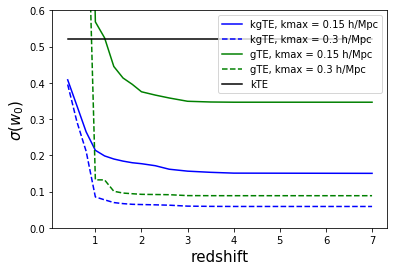

0.5205071104905928 0.1502681576136191 0.05883503861312534


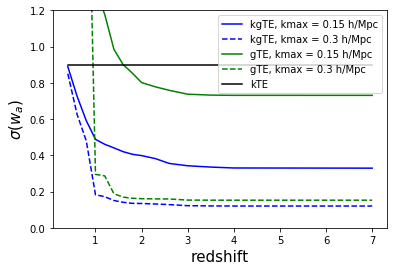

0.8986502451411624 0.32915626924343455 0.12013627529760335


In [100]:
# make the plots
#print nSigmas
doTE = True
#doTE = False
doGTE = True
#doGTE = False

h = hubble
if centers:
    redshifts = binEdges[1:] # top end of each bin
else:
    redshifts = binEdges[2:] # top end of each bin; bin1 not included
if doTE:
    plt.plot(redshifts,sigmas_w0_2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
    plt.plot(redshifts,sigmas_w0_2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
    if doGTE:
        plt.plot(redshifts,sigmas_w0_2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
        plt.plot(redshifts,sigmas_w0_2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[w0Ind],label='kTE',color='k')
else:
    plt.plot(redshifts,sigmas_w0_2_01,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,sigmas_w0_2_02,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[w0Ind],label='kk')
plt.legend()
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma(w_0)$',fontsize=15)
plt.ylim([0,0.6])
plt.show()
if doTE:
    print sigmas_kTE2[w0Ind], sigmas_w0_2_01[-1], sigmas_w0_2_02[-1]
else:
    print sigmas_kk2[w0Ind], sigmas_w0_2_01[-1], sigmas_w0_2_02[-1]

if doTE:
    plt.plot(redshifts,sigmas_wa_2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
    plt.plot(redshifts,sigmas_wa_2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
    if doGTE:
        plt.plot(redshifts,sigmas_wa_2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
        plt.plot(redshifts,sigmas_wa_2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[waInd],label='kTE',color='k')
else:
    plt.plot(redshifts,sigmas_wa_2_01,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,sigmas_wa_2_02,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[waInd],label='kk')
plt.legend()
plt.xlabel('redshift',fontsize=15)
plt.ylabel(r'$\sigma(w_a)$',fontsize=15)
plt.ylim([0,1.2])
plt.show()
if doTE:
    print sigmas_kTE2[waInd], sigmas_wa_2_01[-1], sigmas_wa_2_02[-1]
else:
    print sigmas_kk2[waInd], sigmas_wa_2_01[-1], sigmas_wa_2_02[-1]

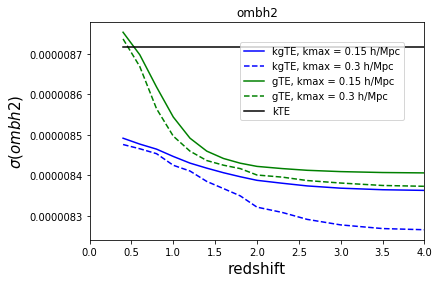

8.717465404191012e-06 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


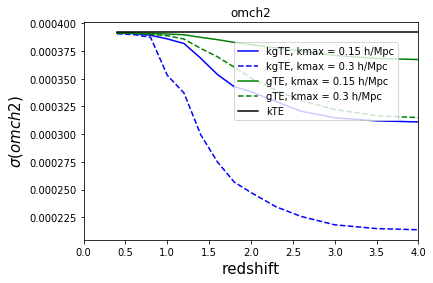

0.0003919113047928974 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


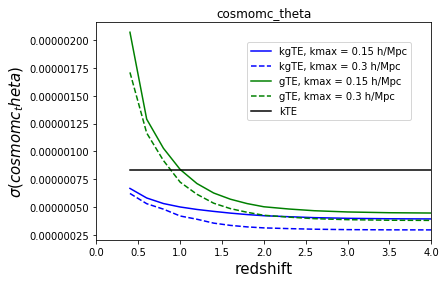

8.328241375367946e-07 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


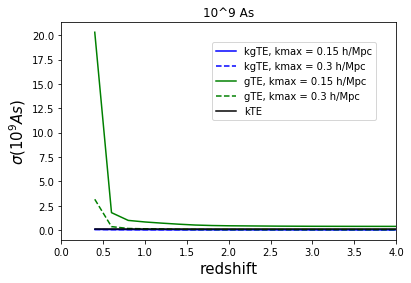

0.12227040124215031 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


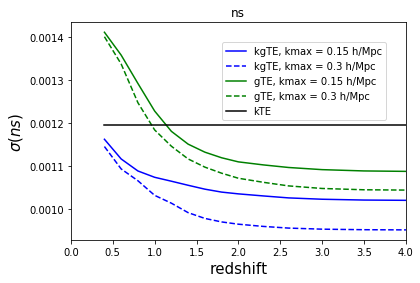

0.0011960071205286524 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


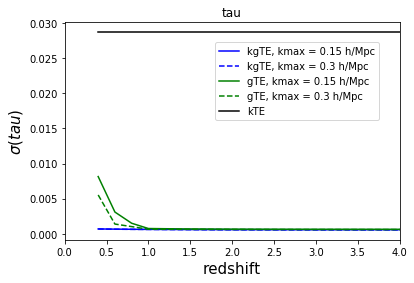

0.028700762389437355 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


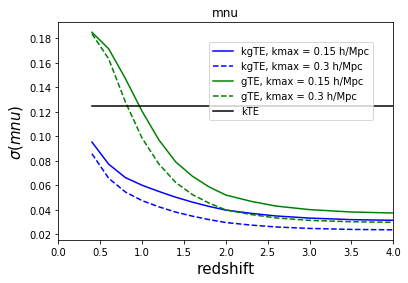

0.12477649185944886 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


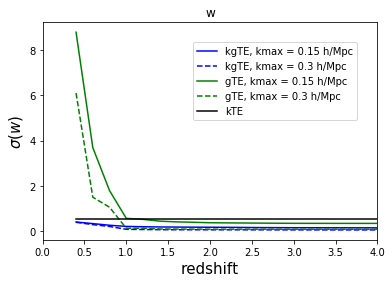

0.5205071104905928 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


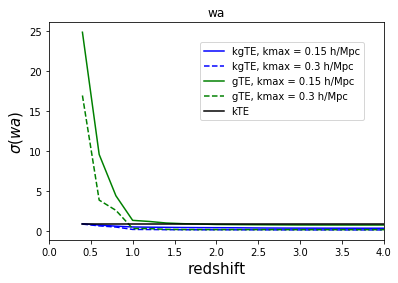

0.8986502451411624 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


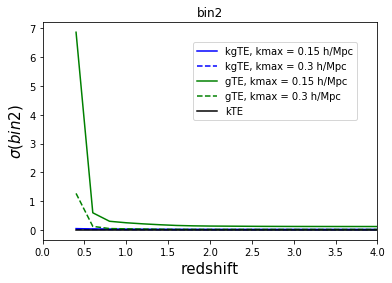

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


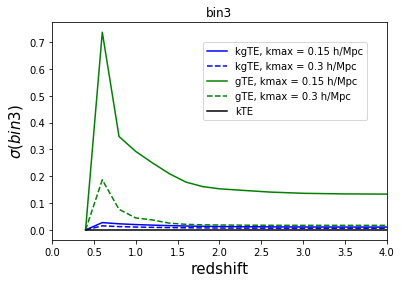

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


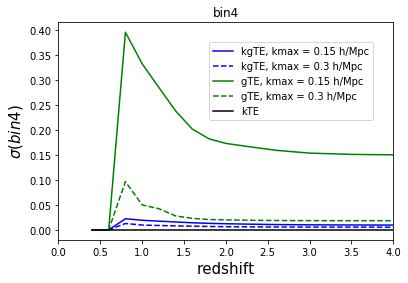

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


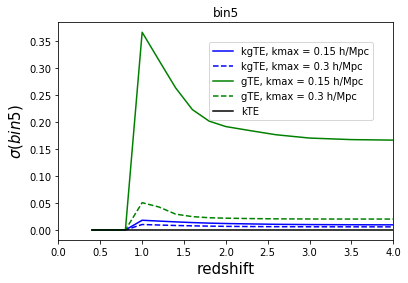

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


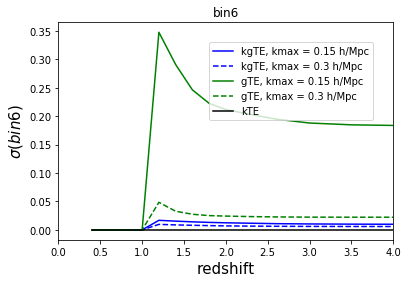

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


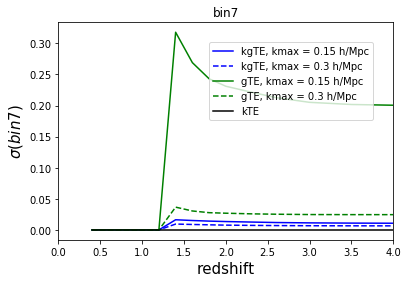

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


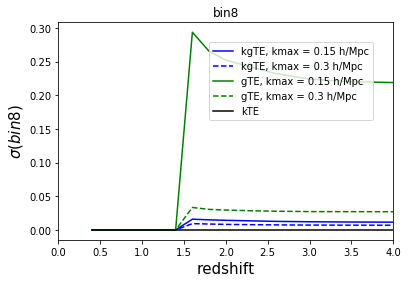

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


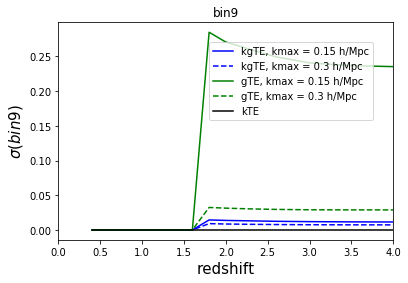

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


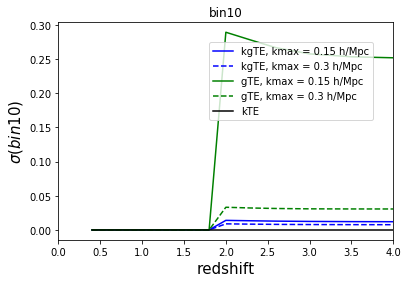

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


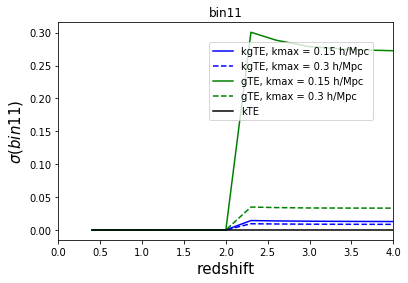

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


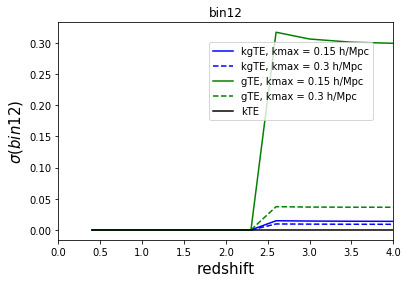

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


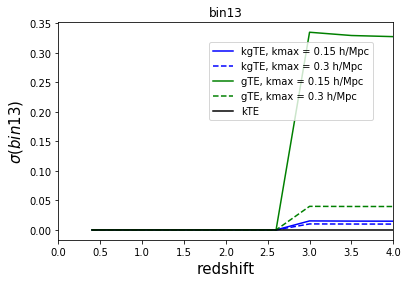

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


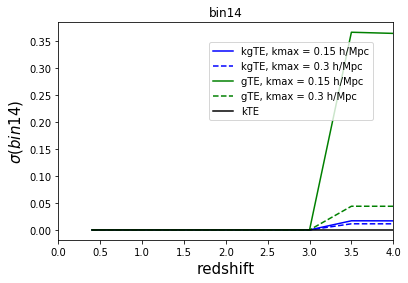

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


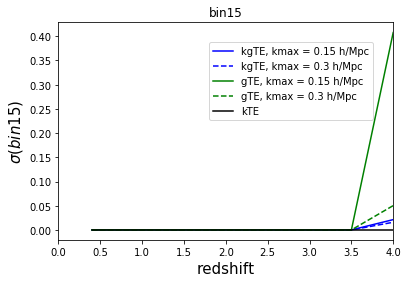

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


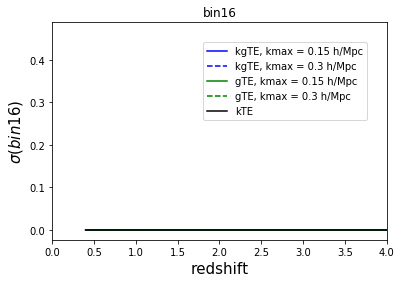

0.0 [8.36280873e-06 3.10849768e-04 3.94018688e-07 1.78466587e-02
 1.01992020e-03 5.72445988e-04 3.12379536e-02 1.50268158e-01
 3.29156269e-01 1.66250079e-02 1.05957476e-02 9.65536718e-03
 9.38562206e-03 9.92498108e-03 1.06978445e-02 1.14583060e-02
 1.13702812e-02 1.19515534e-02 1.27152996e-02 1.36731120e-02
 1.47439766e-02 1.67196083e-02 2.12390448e-02 4.53534334e-02] [8.26552879e-06 2.13679189e-04 2.96223370e-07 1.57263994e-02
 9.51452744e-04 5.42469514e-04 2.35271005e-02 5.88350386e-02
 1.20136275e-01 8.41460866e-03 6.08330684e-03 5.48532582e-03
 5.66843914e-03 5.97612376e-03 6.51727816e-03 6.97769735e-03
 7.25078222e-03 7.63081514e-03 8.45473145e-03 8.98979213e-03
 9.86029865e-03 1.12557699e-02 1.58070127e-02 3.86777412e-02]


In [101]:
# make the plots - all of the sigmas this time
if centers:
    redshifts = binEdges[1:] # top end of each bin
else:
    redshifts = binEdges[2:] # top end of each bin; bin1 not included
for sigmaNum, paramName in enumerate(paramList2_01):
    if doTE:
        plt.plot(redshifts,np.array(sigmaBins2_01)[:,sigmaNum],label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h),color='b',linestyle='-')
        plt.plot(redshifts,np.array(sigmaBins2_02)[:,sigmaNum],label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
        if doGTE:
            plt.plot(redshifts,np.array(sigmaBins2_01g)[:,sigmaNum],label='gTE, kmax = {0} h/Mpc'.format(kmax1/h),color='g',linestyle='-')
            plt.plot(redshifts,np.array(sigmaBins2_02g)[:,sigmaNum],label='gTE, kmax = {0} h/Mpc'.format(kmax2/h),color='g',linestyle='--')
        plt.plot(redshifts,np.ones(nSigmas)*sigmas_kTE2[sigmaNum],label='kTE',color='k')
    else:
        plt.plot(redshifts,np.array(sigmaBins2_01)[:,sigmaNum],label='kTE, kmax = {0} h/Mpc'.format(kmax1/h))
        plt.plot(redshifts,np.array(sigmaBins2_02)[:,sigmaNum],label='kTE, kmax = {0} h/Mpc'.format(kmax2/h))
        plt.plot(redshifts,np.ones(nSigmas)*sigmas_kk2[sigmaNum],label='kk')
    plt.legend()
    plt.xlabel('redshift',fontsize=15)
    plt.ylabel(r'$\sigma({0})$'.format(paramName),fontsize=15)
    plt.title(paramName)
    plt.legend(loc=(0.45,0.55))
    plt.xlim([0,4])
    #plt.ylim([.020,0.200])
    plt.show()
    if doTE:
        print sigmas_kTE2[sigmaNum], sigmaBins2_01[:][-1], sigmaBins2_02[:][-1]
    else:
        print 'kk: ',sigmas_kk2[sigmaNum],', kmax1:', sigmaBins2_01[-1,sigmaNum],', kmax2:', sigmaBins2_02[-1,sigmaNum]


In [102]:
print Fobj2.paramList

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu', 'w', 'wa', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16']


3.3052984432614347


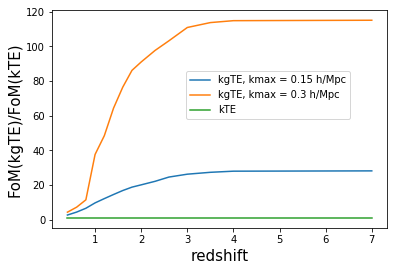

28.131398461127887 115.01422286198243


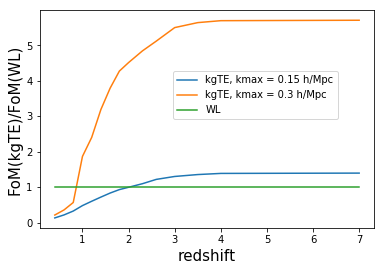

1.3947400131049967 5.702344976679513


In [103]:
# figure of merit too!

FijInv = np.linalg.inv(Fij_kTE2)
#FoMProp_kTE2 = FoMprop(FijInv,iw0=8,iwa=7)
#FoMProp_kk = FoMprop(np.linalg.inv(Fij_kk2),iw0=8,iwa=7)
FoMProp_kTE2 = FoMprop(FijInv,iw0=7,iwa=8)
FoMProp_kk = FoMprop(np.linalg.inv(Fij_kk2),iw0=7,iwa=8)
if doTE:
    print FoMProp_kTE2

    plt.plot(redshifts,FoMPropBins2_01/FoMProp_kTE2,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMProp_kTE2,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='kTE')
    plt.ylabel('FoM(kgTE)/FoM(kTE)',fontsize=15)
else:
    print FoMProp_kk

    plt.plot(redshifts,FoMPropBins2_01/FoMProp_kk,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMProp_kk,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.4,0.5))
plt.xlabel('redshift',fontsize=15)

#plt.ylim((0,0.1))
plt.show()
print FoMPropBins2_01[-1]/FoMProp_kTE2, FoMPropBins2_02[-1]/FoMProp_kTE2

#FoM prop from a paper: https://arxiv.org/pdf/astro-ph/0605696.pdf, figure 6
FoMProp_pap = 1/0.015

plt.plot(redshifts,FoMPropBins2_01/(np.ones(nSigmas)*FoMProp_pap),label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
plt.plot(redshifts,FoMPropBins2_02/(np.ones(nSigmas)*FoMProp_pap),label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
plt.plot(redshifts,np.ones(nSigmas),label='WL')
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.4,0.5))
plt.xlabel('redshift',fontsize=15)
plt.ylabel('FoM(kgTE)/FoM(WL)',fontsize=15)
#plt.ylim((0,0.0001))
plt.show()
print FoMPropBins2_01[-1]/FoMProp_pap, FoMPropBins2_02[-1]/FoMProp_pap

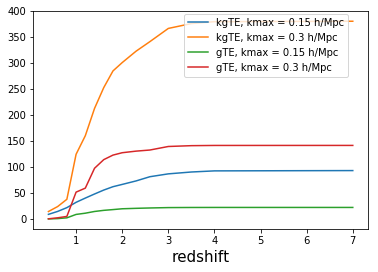

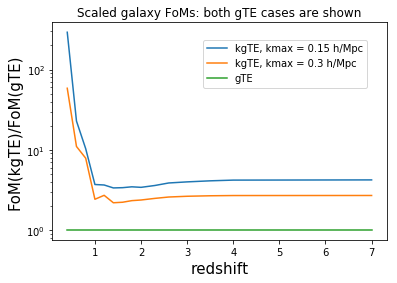

In [104]:
# now for the gTE

if doTE:
    plt.plot(redshifts,FoMPropBins2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,FoMPropBins2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h))
    
    #plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    #plt.plot(redshifts,np.ones(nSigmas),label='gTE')
    
    #plt.semilogy(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.semilogy(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    #plt.semilogy(redshifts,np.ones(nSigmas),label='gTE')
    
    #plt.ylabel('FoM(kgTE)/FoM(gTE)',fontsize=15)
    #plt.title('Scaled galaxy FoMs: both gTE cases are shown')
else:
    print FoMProp_kk

    plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.45,0.7))
plt.xlabel('redshift',fontsize=15)
plt.show()

if doTE:
    #plt.plot(redshifts,FoMPropBins2_01,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.plot(redshifts,FoMPropBins2_02,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    #plt.plot(redshifts,FoMPropBins2_01g,label='gTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.plot(redshifts,FoMPropBins2_02g,label='gTE, kmax = {0} h/Mpc'.format(kmax2/h))
    
    #plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    #plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    #plt.plot(redshifts,np.ones(nSigmas),label='gTE')
    
    plt.semilogy(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kgTE, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.semilogy(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.semilogy(redshifts,np.ones(nSigmas),label='gTE')
    
    plt.ylabel('FoM(kgTE)/FoM(gTE)',fontsize=15)
    plt.title('Scaled galaxy FoMs: both gTE cases are shown')
else:
    print FoMProp_kk

    plt.plot(redshifts,FoMPropBins2_01/FoMPropBins2_01g,label='kg, kmax = {0} h/Mpc'.format(kmax1/h))
    plt.plot(redshifts,FoMPropBins2_02/FoMPropBins2_02g,label='kg, kmax = {0} h/Mpc'.format(kmax2/h))
    plt.plot(redshifts,np.ones(nSigmas),label='k')
    plt.ylabel('FoM(kg)/FoM(k)',fontsize=15)
#plt.legend(loc=(0.5,0.1))
plt.legend(loc=(0.45,0.7))
plt.xlabel('redshift',fontsize=15)
plt.show()

# Show some constraints with w0, wa marginalized

In [105]:
# fix w0,wa
def fixW(Fij):
    waInd = 8
    w0Ind = 7
    myFij = fixParam(Fij,waInd)
    myFij = fixParam(myFij,w0Ind)
    return myFij

Fij_TE2_noW = fixW(FijTE2)
Fij_kTE2_noW = fixW(Fij_kTE2)
Fij_gTE2_01_noW = fixW(Fij_gTE2_01)
Fij_gTE2_02_noW = fixW(Fij_gTE2_02)
print 'done.'

done.


In [106]:
fsky = 0.4

sigmas_TE2_noW     = getSigmas(Fij_TE2_noW*fsky)
sigmas_kTE2_noW    = getSigmas(Fij_kTE2_noW*fsky)
sigmas_gTE2_01_noW = getSigmas(Fij_gTE2_01_noW*fsky)
sigmas_gTE2_02_noW = getSigmas(Fij_gTE2_02_noW*fsky)
#sigmas_gTE2_01_noW = getSigmas(Fij_gTE2_01_noW[:nCosParams,:nCosParams])
#sigmas_gTE2_02_noW = getSigmas(Fij_gTE2_02_noW[:nCosParams,:nCosParams])
print 'done.'

done.


In [107]:
# show some sigmas
mnuInd = 6
print sigmas_TE2_noW[mnuInd]
print sigmas_kTE2_noW[mnuInd]
print sigmas_gTE2_01_noW[mnuInd]
print sigmas_gTE2_02_noW[mnuInd]

0.29853924325298037
0.13381992067478504
0.053044473029142725
0.03823047303156477


In [108]:
# convert to H0
myNParams = 7
myParamList = Fobj2.paramList[:myNParams]
print myParamList

['ombh2', 'omch2', 'cosmomc_theta', '10^9 As', 'ns', 'tau', 'mnu']


In [109]:
# The only derivatives in the Jacobian are on the dtheta/dparam row.
# derivatives from notebook "Transform Fisher Matrix with Jacobian"
dthetas = [-2.46099289e-02,  1.05373002e-02,  2.98929388e-05,  # dtheta_dombh2, dtheta_domch2, dtheta_dH0
            0.00000000e+00,  0.00000000e+00,  0.00000000e+00,   # dtheta_dAs, dtheta_dns, dtheta_dtau
            1.94175593e-04,  8.94926461e-04,  2.43189330e-04]   # dtheta_mnu, dtheta_w, dtheta_wa

mcIndex = 2
jacobian = np.diag(np.ones(nParams))
jacobian[mcIndex,:nCosParams] = dthetas#*100

In [110]:
# cut out bin1 from Fij and paramList since it was never used
jacobian = fixParam(jacobian,nCosParams)
#myParamList = np.delete(paramList,nCosParams,0)

In [111]:
# jacobian-it-up
miniJac = jacobian[:nCosParams,:nCosParams]

Fij_TE2_t     = np.dot(miniJac.T,np.dot(FijTE2,miniJac))
Fij_kTE2_t    = np.dot(miniJac.T,np.dot(Fij_kTE2,miniJac))
Fij_gTE2_01_t = np.dot(jacobian.T,np.dot(Fij_gTE2_01,jacobian))
Fij_gTE2_02_t = np.dot(jacobian.T,np.dot(Fij_gTE2_02,jacobian))

Fij_TE2_noW_t     = fixW(Fij_TE2_t)
Fij_kTE2_noW_t    = fixW(Fij_kTE2_t)
Fij_gTE2_01_noW_t = fixW(Fij_gTE2_01_t)
Fij_gTE2_02_noW_t = fixW(Fij_gTE2_02_t)

# adjust name
myParamList[mcIndex] = 'H0'
print myParamList

['ombh2', 'omch2', 'H0', '10^9 As', 'ns', 'tau', 'mnu']


In [112]:
sigmas_TE2_noW_t     = getSigmas(Fij_TE2_noW_t*fsky)
sigmas_kTE2_noW_t    = getSigmas(Fij_kTE2_noW_t*fsky)
sigmas_gTE2_01_noW_t = getSigmas(Fij_gTE2_01_noW_t*fsky)
sigmas_gTE2_02_noW_t = getSigmas(Fij_gTE2_02_noW_t*fsky)

In [113]:
# show some sigmas
mnuInd = 6
print sigmas_TE2_noW_t[mnuInd]
print sigmas_kTE2_noW_t[mnuInd]
print sigmas_gTE2_01_noW_t[mnuInd]
print sigmas_gTE2_02_noW_t[mnuInd]

0.2985392432540784
0.13381992067514292
0.05304447302916831
0.038230473031560026


In [114]:
# the whole set for TE
for i,name in enumerate(myParamList):
    print name,': ',sigmas_TE2_noW_t[i]

ombh2 :  1.3929968822855267e-05
omch2 :  0.000619896127777573
H0 :  2.02539829383823
10^9 As :  0.4739980945467355
ns :  0.002305430088647346
tau :  0.11157389498090108
mnu :  0.2985392432540784


In [115]:
# compare to Byeonghee's values
"""
{'As': 3.4715938322001281e-10,
 'H0': 3.2104711009865672,
 'mnu': 0.34643884352014354,
 'ns': 0.0023605108462934812,
 'ombh2': 2.9979111762661943e-05,
 'omch2': 0.00078185341013362877,
 'tau': 0.081251132776938489}
"""
sigmasBye = [2.9979111762661943e-05,0.00078185341013362877,3.2104711009865672,0.34715938322001281,
             0.0023605108462934812,0.081251132776938489,0.34643884352014354]

print sigmasBye

[2.9979111762661943e-05, 0.0007818534101336288, 3.210471100986567, 0.34715938322001283, 0.002360510846293481, 0.08125113277693849, 0.34643884352014354]


In [116]:
from prettytable import PrettyTable

t = PrettyTable(['Parameter','S4 Z', 'S4 Bye','% diff'])
for i,p in enumerate(myParamList):
    Bi = sigmasBye[i]
    Zi = sigmas_TE2_noW_t[i]
    diff = (Bi-Zi)/Zi *100
    t.add_row([p,"%5.3g" % Zi,"%5.3g" % Bi,"%5.3g" % diff] )
print t


+-----------+----------+----------+--------+
| Parameter |   S4 Z   |  S4 Bye  | % diff |
+-----------+----------+----------+--------+
|   ombh2   | 1.39e-05 |  3e-05   |   115  |
|   omch2   | 0.00062  | 0.000782 |  26.1  |
|     H0    |   2.03   |   3.21   |  58.5  |
|  10^9 As  |  0.474   |  0.347   | -26.8  |
|     ns    | 0.00231  | 0.00236  |  2.39  |
|    tau    |  0.112   |  0.0813  | -27.2  |
|    mnu    |  0.299   |  0.346   |    16  |
+-----------+----------+----------+--------+


# get $\sigma_{\Sigma m_{nu}}(z)$ with $w_0,w_a$ fixed

In [117]:
sigmaBins2_02nw,FoMPropBins2_02nw,paramList2_02nw = getKZlimited(covarBins2_02,dClVecsBins2_02,
                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
                                                           centers=centers,fixW=True)
print 'done.'

lmaxByBin:  [   2  170  324  460  581  688  783  868  944 1013 1075 1159 1232 1318
 1408 1486 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
0 59500 (17, 25, 140) (17, 17, 140)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bi

  the cut preMask:  [0 5 6 7 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  4
  use 5 bin numbers from pmb[2]  with bin numbers [0 7 6 5 4]
  toCut:  [ 1  2  3  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 4 5 6 7 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6
 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  5
  use 6 bin numbers from pmb[1]  with bin numbers [0 7 6 5 4 3]
  toCut:  [ 1  2  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  6
  use 7 bin numbers from pmb[0]  with bin numbers [0 7 6 5 4 3 2]
  toCut:  [ 1  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7
 7 7 7 7 7 7 7 7]
nBlocks:  6 , nBlocks2:  6
0 28500 (12, 25, 95) (

  the cut preMask:  [ 0  4  5  6  7  8  9 10  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  9
  use 10 bin numbers from pmb[0]  with bin numbers [ 0 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 11 12 13 14 15 16]
  the cut preMask:  [ 0  2  3  4  5  6  7  8  9 10  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4


  starting block  9
  use 10 bin numbers from pmb[2]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 13 14 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12  4  4  4  4  4  4  4  4  4  4  4  4  4  5
  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12]
  starting block  10
  use 11 bin numbers from pmb[1]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10 11 12  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11
 11 11 11 11 11 12 12 12 12 12]
  starting block  11
  use 12 bin numbers from pmb[0]  with bin numbers [ 0 12 11 10 

  the cut preMask:  [ 0  7  8  9 10 11 12 13 14  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14]
  starting block  9
  use 10 bin numbers from pmb[4]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 15 16]
  the cut preMask:  [ 0  6  7  8  9 10 11 12 13 14  6  6  6  6  6  6  6  6  6  6  6  7  7  7
  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14
 14]
  starting block  10
  use 11 bin numbers from pmb[3]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 

5 58650 (34, 25, 69) (34, 34, 69)
6 81700 (43, 25, 76) (43, 43, 76)
7 112625 (53, 25, 85) (53, 53, 85)
8 152000 (64, 25, 95) (64, 64, 95)
9 203300 (76, 25, 107) (76, 76, 107)
10 269225 (89, 25, 121) (89, 89, 121)
11 350200 (103, 25, 136) (103, 103, 136)
12 454300 (118, 25, 154) (118, 118, 154)
13 469000 (134, 25, 140) (134, 134, 140)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (23, 23)
for clkk: lmin =  1408 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  16 , with sigmaBins index =  14 , pmb[14] = [ 0 16 16]
  starting block  1
  use 2 bin numbers from pmb[14]  with bin numbers [ 0 16]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
  the cut preMask:  [ 0 16 16]
  starting block  2
  use 3 bin numbers from pmb[13]  with bin numbers [ 0 16 15]
  toCut:  [ 1  2  3  4  5  6  7

fsky:  0.4 , fsky^(-1/2): , 1.58113883008


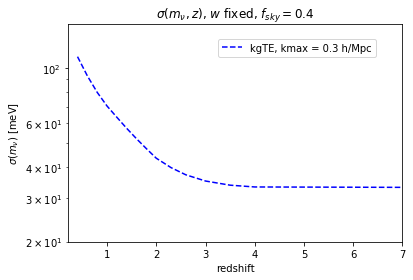

[111.18532247  93.0340253   79.86632231  70.35567559  63.37387332
  57.19654058  51.9231588   47.38601264  43.38143286  39.76454467
  37.20660742  35.12447544  33.79716926  33.24311592  33.12379945]


In [118]:
redshifts = binEdges[2:] 
print 'fsky: ',fsky,', fsky^(-1/2): ,',fsky**(-.5)

plt.semilogy(redshifts,np.array(sigmaBins2_02nw)[:,6]*fsky**(-.5)*1000,label='kgTE, kmax = {0} h/Mpc'.format(kmax2/h),color='b',linestyle='--')
plt.legend(loc=(0.45,0.85))
plt.xlim([0.2,7])
plt.ylim([.020*1000,0.150*1000])
plt.xlabel('redshift')
plt.ylabel(r'$\sigma(m_\nu)$ [meV]')
plt.title(r'$\sigma(m_\nu,z)$, $w$ fixed, $f_{{sky}} = {0}$'.format(fsky))
plt.show()

print sigmaBins2_02nw[:,6]*fsky**(-.5)*1000

In [119]:
# for comparison, this:
sigmaBins2_02nw2,FoMPropBins2_02nw2,paramList2_02nw2,Fij2_02nw2 = getKZlimited(covarBins2_02,dClVecsBins2_02,
                                                           preMaskBins2_02,Fobj2,lmaxByBin2_02,FijTE2,
                                                           centers=centers,fixW=True,getFij=True)
print 'done.'

lmaxByBin:  [   2  170  324  460  581  688  783  868  944 1013 1075 1159 1232 1318
 1408 1486 2000]

starting bin number  2 , with sigmaBins index =  0 , pmb[0] = [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6
  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8
  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11
 11 12 12 12 12 12 13 13 13 13 14 14 14 15 15 16]
  starting block  1
  use 2 bin numbers from pmb[0]  with bin numbers [0 2]
  toCut:  [ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
nBlocks:  1 , nBlocks2:  1
0 59500 (17, 25, 140) (17, 17, 140)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bi

  the cut preMask:  [0 5 6 7 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  4
  use 5 bin numbers from pmb[2]  with bin numbers [0 7 6 5 4]
  toCut:  [ 1  2  3  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 4 5 6 7 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6
 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  5
  use 6 bin numbers from pmb[1]  with bin numbers [0 7 6 5 4 3]
  toCut:  [ 1  2  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 3 4 5 6 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7]
  starting block  6
  use 7 bin numbers from pmb[0]  with bin numbers [0 7 6 5 4 3 2]
  toCut:  [ 1  8  9 10 11 12 13 14 15 16]
  the cut preMask:  [0 2 3 4 5 6 7 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 7 7
 7 7 7 7 7 7 7 7]
nBlocks:  6 , nBlocks2:  6
0 28500 (12, 25, 95) (

  the cut preMask:  [ 0  4  5  6  7  8  9 10  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5
  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10]
  starting block  8
  use 9 bin numbers from pmb[1]  with bin numbers [ 0 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 11 12 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10]
  starting block  9
  use 10 bin numbers from pmb[0]  with bin numbers [ 0 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 11 12 13 14 15 16]
  the cut preMask:  [ 0  2  3  4  5  6  7  8  9 10  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4


  starting block  10
  use 11 bin numbers from pmb[1]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3]
  toCut:  [ 1  2 13 14 15 16]
  the cut preMask:  [ 0  3  4  5  6  7  8  9 10 11 12  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11
 11 11 11 11 11 12 12 12 12 12]
  starting block  11
  use 12 bin numbers from pmb[0]  with bin numbers [ 0 12 11 10  9  8  7  6  5  4  3  2]
  toCut:  [ 1 13 14 15 16]
  the cut preMask:  [ 0  2  3  4  5  6  7  8  9 10 11 12  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4
  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6
  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 

  starting block  9
  use 10 bin numbers from pmb[4]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6]
  toCut:  [ 1  2  3  4  5 15 16]
  the cut preMask:  [ 0  6  7  8  9 10 11 12 13 14  6  6  6  6  6  6  6  6  6  6  6  7  7  7
  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 13 13 13 13 14 14
 14]
  starting block  10
  use 11 bin numbers from pmb[3]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5]
  toCut:  [ 1  2  3  4 15 16]
  the cut preMask:  [ 0  5  6  7  8  9 10 11 12 13 14  5  5  5  5  5  5  5  5  5  5  5  5  6
  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8  8  8
  8  8  8  8  8  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 11 11 11 11
 11 11 12 12 12 12 12 13 13 13 13 14 14 14]
  starting block  11
  use 12 bin numbers from pmb[2]  with bin numbers [ 0 14 13 12 11 10  9  8  7  6  5  4]
  toCut:  [ 1  2  3 15 16]
  the cut preMask:  [ 0  4  5  6  7  8  9 10 11 12 13 14  4  4 

11 350200 (103, 25, 136) (103, 103, 136)
12 454300 (118, 25, 154) (118, 118, 154)
13 469000 (134, 25, 140) (134, 134, 140)
['ombh2' 'omch2' 'cosmomc_theta' '10^9 As' 'ns' 'tau' 'mnu' 'w' 'wa'
 'bin2' 'bin3' 'bin4' 'bin5' 'bin6' 'bin7' 'bin8' 'bin9' 'bin10' 'bin11'
 'bin12' 'bin13' 'bin14' 'bin15' 'bin16']
original myFij.shape:  (24, 24)
trimmed myFij.shape:  (23, 23)
for clkk: lmin =  1408 , lmax = , 2000
Fijkk.shape:  (9, 9)

starting bin number  16 , with sigmaBins index =  14 , pmb[14] = [ 0 16 16]
  starting block  1
  use 2 bin numbers from pmb[14]  with bin numbers [ 0 16]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
  the cut preMask:  [ 0 16 16]
  starting block  2
  use 3 bin numbers from pmb[13]  with bin numbers [ 0 16 15]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
  the cut preMask:  [ 0 15 16 15 15 16]
  starting block  3
  use 4 bin numbers from pmb[12]  with bin numbers [ 0 16 15 14]
  toCut:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
  the cut preM

In [120]:
nSigs = Fij2_02nw2.__len__()
sigmasCheck = np.zeros(nSigs)
for i in range(nSigs):
    sigmas = getSigmas(Fij2_02nw2[i])
    sigmasCheck[i] = sigmas[6]
print sigmasCheck*fsky**(-.5)*1000

[111.18532247  93.0340253   79.86632231  70.35567559  63.37387332
  57.19654058  51.9231588   47.38601264  43.38143286  39.76454467
  37.20660742  35.12447544  33.79716926  33.24311592  33.12379945]


In [121]:
# ok, getting sigmas or Fij from getKZlimited gives consistent results